# Programming Project 3 
## 605.649 Introduction to Machine Learning
## Ricca Callis

## Directions

The purpose of this assignment is to give you a chance to get some hands-on experience learning decision
trees for classification and regression. This time around, we are not going to use anything from the module
on rule induction; however, you might want to examine the rules learned for your trees to see if they “make
sense.” Specifically, you will be implementing a standard univariate (i.e., axis-parallel) decision tree and willcompare the performance of the trees when grown to completion on trees that use either early stopping (for
regression trees) or reduced error pruning (for classification trees).

For decision trees, it should not matter whether you have categorical or numeric attributes, but you need
to remember to keep track of which is which. In addition, you need to implement that gain-ratio criterion
for splitting in your classification trees. For the regression trees, all of the attributes will be numeric.
For this assignment, you will use three classification datasets and three regression data sets that you will
download from the UCI Machine Learning Repository, namely:

1. Abalone — https://archive.ics.uci.edu/ml/datasets/Abalone
[Classification] Predicting the age of abalone from physical measurements.

2. Car Evaluation — https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
[Classification] The data is on evaluations of car acceptability based on price, comfort, and technical
specifications.

3. Image Segmentation — https://archive.ics.uci.edu/ml/datasets/Image+Segmentation
[Classification] The instances were drawn randomly from a database of 7 outdoor images. The images
were hand segmented to create a classification for every pixel.

4. Computer Hardware — https://archive.ics.uci.edu/ml/datasets/Computer+Hardware
[Regression] The estimated relative performance values were estimated by the authors using a linear
regression method. The gives you a chance to see how well you can replicate the results with these two
models.

5. Forest Fires — https://archive.ics.uci.edu/ml/datasets/Forest+Fires
[Regression] This is a difficult regression task, where the aim is to predict the burned area of forest
fires, in the northeast region of Portugal, by using meteorological and other data .

6. Wine Quality — https://archive.ics.uci.edu/ml/datasets/Wine+Quality
[Regression] This contains two data sets, one for red wine and one for white. Either combine the data
sets into a single set for the regression task or build separate regression trees. This is your choice;
however, we expect

### For this project, the following steps are required:

 Download the six (6) data sets from the UCI Machine Learning repository. You can find this repository
at http://archive.ics.uci.edu/ml/. All of the specific URLs are also provided above.

 Implement the ID3 algorithm for classification decision trees using gain-ratio as the splitting criterion.

 Implement reduced-error pruning to be used as an option with your implementation of ID3.

 Run your ID3 implementation on each of the three classification data sets, comparing both pruned
and unpruned versions of the trees. These runs should be done with 5-fold cross-validation so you can
compare your results statistically. You should pull out 10% of the data to be used as a validation set
and then use the remaining 90% for cross validation. You should use classification error for your loss
function.

 Implement the CART algorithm for regression decision trees using mean squared error as the splitting
criterion.

 Incorporate a cut-off threshold for early stopping. If the threshold is set to zero, this should indicate
no early stopping.

 Run your CART implementation on each of the three regression data sets, comparing both full and
stopped versions of the trees. You will need to tune the stopping threshold and should use the same
procedure for extracting a validation set to serve as your tuning set. The runs should be done with
5-fold cross-validation so you can compare your results statistically. You should use mean squared
error for your loss function.

 Write a very brief paper that incorporates the following elements, summarizing the results of your
experiments.

1. Title and author name
2. A brief, one paragraph abstract summarizing the results of the experiments
3. Problem statement, including hypothesis, projecting how you expect each algorithm to perform
4. Brief description of algorithms implemented
5. Brief description of your experimental approach
6. Presentation of the results of your experiments
7. A discussion of the behavior of your algorithms, combined with any conclusions you can draw
8. Summary
9. References (you should have at least one reference related to each of the algorithms implemented, a reference to the data sources, and any other references you consider to be relevant)

 Submit your fully documented code, the outputs from running your programs, and your paper. Your
grade will be broken down as follows:

– Code structure – 10%
– Code documentation/commenting – 10%
– Proper functioning of your code, as illustrated by a 5 minute video – 30%
– Summary paper – 50%

In [1]:
# Author: Ricca Callis
# EN 605.649 Introduction to Machine Learning
# Programming Project #3
# Date Created: 7/6/2020
# File name: Programming Assignment 3 - Callis.ipynb
# Python Version: 3.7.5
# Jupyter Notebook: 6.0.1
# Description: Implementation of decision tree classifier and regressor algorithms ID3 & CART 
# using 6 datasets from the UCI Machine Learning Repository

"""
ID3 Algorithm: Algorithm for classification decision trees using gain-ratio as the splitting criterion
"""

"""
CART Algorithm: Algorithm for regression decision trees using mean squared error as the splitting criterion.
"""


"""
Required Data Sets:
    abalone.data.csv
    abalone.names.csv
    car.data.csv
    car.names.csv
    forestfires.data.csv
    forestfires.names.csv
    machine.data.csv
    machine.names.csv
    segmentation.data.csv
    segmentation.names.csv
    winequality-red.csv
    winequality-white.csv
    winequality.names.csv
""" 


'\nRequired Data Sets:\n    abalone.data.csv\n    abalone.names.csv\n    car.data.csv\n    car.names.csv\n    forestfires.data.csv\n    forestfires.names.csv\n    machine.data.csv\n    machine.names.csv\n    segmentation.data.csv\n    segmentation.names.csv\n    winequality-red.csv\n    winequality-white.csv\n    winequality.names.csv\n'

In [2]:
from platform import python_version
print ( python_version() )

3.7.5


In [3]:
# Common standard libraries
import datetime
import time
import os
# Common external libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import sklearn #scikit-learn
import sklearn
from sklearn.model_selection import train_test_split 
import random as py_random
import numpy.random as np_random
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import scipy.stats as stats
from toolz import pipe # pass info from one process to another (one-way communication)
from typing import Callable, Dict, Union, List
from collections import Counter, OrderedDict
import logging
import multiprocessing
import operator
import sys
import copy
from typing import Callable, Dict, Union
from functools import partial
from itertools import product
import warnings
import io
import requests as r

logging.basicConfig ( filename ='logfile.txt' )
logging.basicConfig()
logging.root.setLevel ( logging.INFO )
logger = logging.getLogger ( __name__ )

sys.setrecursionlimit ( 10000 )

In [4]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [5]:
# Check current directory
currentDirectory = os.getcwd()
print ( currentDirectory )

/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 3


In [6]:
# Input data files are available in the ".../input/" directory
# Change the Current working Directory
os.chdir ( '/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 3/input' )

# Get Current working Directory
currentDirectory = os.getcwd()
print ( currentDirectory )

/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 3/input


In [7]:
# List files in input directory
from subprocess import check_output
print ( check_output ( [ "ls", "../input" ] ).decode ( "utf8" ) )

abalone.data.csv
abalone.names.csv
car.data.csv
car.names.csv
forestfires.data.csv
forestfires.names.csv
machine.data.csv
machine.names.csv
segmentation.data.csv
segmentation.names.csv
winequality-red.csv
winequality-white.csv
winequality.names.csv



# Decision Trees


**Overview:**

A Decision tree is a non-parametric supervised learning technique. Generally, decision trees employ greedy searches to best partition the feature space so as to explain the target variable.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.


## Types of Decision Trees

Types of decision trees are based on the type of target variable we have. It can be of two types:

    1. Categorical Variable Decision Tree: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.
    
    2. Continuous Variable Decision Tree: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.

## Terminology

Root Node: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.

Splitting: It is a process of dividing a node into two or more sub-nodes.

Decision Node: When a sub-node splits into further sub-nodes, then it is called the decision node.

Leaf / Terminal Node: Nodes do not split is called Leaf or Terminal node.

Pruning: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.

Branch / Sub-Tree: A subsection of the entire tree is called branch or sub-tree.

Parent and Child Node: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

Decision trees classify the examples by sorting them down the tree from the root to some leaf/terminal node, with the leaf/terminal node providing the classification of the example. Each node in the tree acts as a test case for some attribute, and each edge descending from the node corresponds to the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new node.


### ID3

The Iterative Dichotomizer 3 (ID3) algorithm is a non-parametric decision supervised learning algorithm, originally proposed for classification problems. ID3 builds decision trees using a top-down greedy search approach through the space of possible branches with no backtracking. A greedy algorithm, as the name suggests, always makes the choice that seems to be the best at that moment.

**Steps in ID3 algorithm:**
1. It begins with the original set S as the root node.

2. On each iteration of the algorithm, it iterates through the very unused attribute of the set S and calculates Entropy(H) and Information gain(IG) of this attribute.

3. It then selects the attribute which has the smallest Entropy or Largest Information gain.

4. The set S is then split by the selected attribute to produce a subset of the data.

5. The algorithm continues to recur on each subset, considering only attributes never selected before.

### CART

Similar to ID3 but is adapted to regression problems by replacing the entropy expression with MSE.

### Attribute Selection Measures

**Entropy** 

Entropy is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information.

ID3 follows the rule — A branch with an entropy of zero is a leaf node and A brach with entropy more than zero needs further splitting.

**Gini Index**
The Gini index is a cost function used to evaluate splits in the dataset. It is calculated by subtracting the sum of the squared probabilities of each class from one. It favors larger partitions and easy to implement whereas information gain favors smaller partitions with distinct values. Gini Index works with the categorical target variable “Success” or “Failure”. It performs only Binary splits.The higher the value of Gini index, the higher the homogeneity.

Steps to Calculate Gini index for a split:

1. Calculate Gini for sub-nodes, using the above formula for success(p) and failure(q) (p²+q²).

2. Calculate the Gini index for split using the weighted Gini score of each node of that split.

CART (Classification and Regression Tree) uses the Gini index method to create split points.

**Information Gain**
Information gain or IG is a statistical property that measures how well a given attribute separates the training examples according to their target classification. Constructing a decision tree is all about finding an attribute that returns the highest information gain and the smallest entropy.

Information gain is a decrease in entropy. It computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. 

ID3 decision tree algorithm uses information gain.

**Gain Ratio**
Gain ratio overcomes the problem with information gain by taking into account the number of branches that would result before making the split. It corrects information gain by taking the intrinsic information of a split into account.

### Avoiding Overfitting: Pruning

The splitting process results in fully grown trees until the stopping criteria are reached. But, the fully grown tree is likely to overfit the data, leading to poor accuracy on unseen data.

In pruning, you trim off the branches of the tree, i.e., remove the decision nodes starting from the leaf node such that the overall accuracy is not disturbed. This is done by segregating the actual training set into two sets: training data set, D and validation data set, V. Prepare the decision tree using the segregated training data set, D. Then continue trimming the tree accordingly to optimize the accuracy of the validation data set, V.

In [8]:
# Building Decision Tree
# Attribute Selection Metrics

# Entropy used for ID3 Algorithm (Decision Tree Classification)
def entropy ( target_array ):
    """
    Function finds entropy of a given set of class labels
        Parameters:
            target_array: Indicates "y", or the target array. (Type: Array; np.ndarray) 
    """
    return -1 * sum (
        [
            pipe ( np.sum ( target_array == value ) / len ( target_array ), lambda ratio: ratio * np.log ( ratio ) )
            for value in set ( target_array )
        ]
    ) # End entropy()


def negative_mse ( target_array ):
    """
    Function finds the negative mean squared distance from mean for point in Y (variance)
        Parameters:
            target_array: Indicates "y", or the target array. (Type: Array; np.ndarray) 
    """
    return -1 * mse ( target_array )
    # End negative_mse()

# Mean Squared Error (mse) used for CART algorithm (Decision Tree Regression)
def mse ( target_array ):
    """
    Function finds mean squared distance from mean for point in Y (variance)
        Parameters:
            target_array: Indicates "y", or the target array. (Type: Array; np.ndarray) 
    """
    return np.mean ( ( target_array - np.mean ( target_array ) ) ** 2 )
    # End mse()

# Building Decision Tree
# Nodes

'''''
Class: TreeSplits
    - This class contains functions for decision tree nodes

Functions:
    -__init__: Initializes the TreeSplits class
    - updateTreeValues: Function to update the values of the TreeSplits object  
    - isNodeLeaf: Function to determine whether a node is a leaf (i.e., has no children)

'''''
class TreeSplits:

    def __init__ (
        # Initialize parameters
        self,
        feature_column = None,
        feature_value = None,
        node_type = None,
        nodes = None,
        children = [],
    ):
        self.feature_column = feature_column  # Column index of split
        self.feature_value = feature_value  # Value of split (for continuous)
        self.node_type = node_type  # Continuous or discrete
        self.nodes = nodes  # Children nodes
        self.children = children  # Target values
        # End __init__()

    def updateTreeValues ( self, feature_column, feature_value, node_type, nodes, children = [ ] ):
        """
        Function to update the values of a TreeSplits object.
            Parameters:
                self: Indicates class instance
                feature_column: Indicates column index of split
                feature_value: Indicates the value of the split (for continuous data)
                node_type: Indicates whether the node is continuous or discrete
                nodes: Indicates children nodes
                children: Indicates target values
            Returns: N/A
        """
        self.feature_column = feature_column
        self.feature_value = feature_value
        self.node_type = node_type
        self.nodes = nodes
        self.children = children
        # End updateTreeValues()

    def isNodeLeaf ( self ):
        """
        Function to determine whether a node is a leaf (i.e., has no children).
            Parameters: 
                self: Indicates class instance
            Returns: N/A
        """
        return self.nodes is None or len ( self.nodes ) == 0
        # End isNodeLeaf
    # End TreeSplits class

# Building Decision Tree
# Base Tree

'''''
Class: BaseTree
    - This class contains all the base functions for a decision tree

Functions:
    -__init__: Initializes the BaseTree class
    - get_valid_midpoints:Function to get the midpoints between values of target array to score in determining 
    best split.
    - get_split_goodness_fit_continuous: Function to evaluate the goodness of the continuous split value.
    - get_min_across_splits_continuous: Function to get the best split (i.e., minimum number of splits)
    across many proposed splits.
    - get_optimal_continuous_feature_split: Function to get the best continuous split for a column.
    - get_discrete_split_value: Function to get the value of making a discrete split.
    - get_optimal_discrete_feature_split: Function to get the best split value for a discrete columns.
    - get_terminal_node: Function to create a terminal node.
    - get_continuous_node: Function to create a continuous node split.
    - get_discrete_node: Function to create a discrete node split.
    - get_next_split: Function get get the next split in the decision tree.
    - fit:Function to fit the decision tree.
    - collect_children: Function to get all the target values of leaves for a subtree. Used for post-pruning.
    - predict_from_all_children: Gets the prediction by treating a subtree as a leaf.
    - predict_node: Function which makes predictions based on a subtree.
    - predict: Function to make predictions over an X matrix.

'''''
class BaseTree:
    """
    Base class with decision tree functionality.
    """

    def __init__ (
        # Initialize parameters
        self,
        map_column_node_type: Dict, # Maps column index to node type
        evaluate_function: Callable, # Takes set of target values & returns score
        agg_function: Callable, # Prediction based on values in a leaf node
        early_stopping_value: float = None,
        early_stopping_comparison: Callable = operator.le,
    ):
        """
        Parameters:
            map_column_node_type: Indicates the mapping from the column index to the node type 
                ("discrete" or "continuous"). This dictates the splitting technique used (Type: dict).
            evaluate_function: Takes a set of target values and returns a score. Seeks to maximize the 
                value. (Type: Callable)
            agg_function: Function used for prediction based on the values in a leaf node. (Type: Callable)
            early_stopping_value: The necessary change in the loss function for the algorithm to continue 
                splitting. Defaults to zero if none is passed. (Type: float)
            early_stopping_comparison: This function determines whether value must be less then or greater 
                than value.Changes based on regression or classification. Defaults to less than or equal to. 
                (Type: Callable)
        """
        self.agg_function = agg_function # For predictions based on values in a leaf
        self.map_column_node_type = map_column_node_type # Map column index to node type
        self.evaluate_function = evaluate_function # Return maximized score
        # Value used to continue splitting
        self.early_stopping_value = (
            0 if not early_stopping_value else early_stopping_value
        ) # Stops at zero if none is passed
        self.n_nodes = 1 # Number of nodes
        self.early_stopping_comparison = early_stopping_comparison
        # End __initi__()

    @staticmethod
    def get_valid_midpoints ( feature_array: np.ndarray, target_array: np.ndarray ):
        """
        Function to get the midpoints between values of the feature array to score in determining best split.
            Parameters:
                feature_array: The feature array ("X") used for splits (Type: Array; np.ndarray)
                target_array: The target array ("Y") (Type: Array; np.ndarray)
            Returns: valid_midpoints: Indicates the points where differences are greater than 0 (uniqueness)
                and y values are not the same
        """
        # Get sorted indices
        indices = np.argsort ( feature_array )

        # Get sorted feature array
        sorted_feature_array = feature_array [ indices ]

        # Get the differences between adjacent values
        feature_array_diffs = np.diff ( sorted_feature_array )

        # Get the midpoints
        midpoints = sorted_feature_array [ 1 : ] - feature_array_diffs / 2

        # Get points where differences are greater than 0 (uniqueness) and y values are not the same
        # See report for details on the latter part.
        valid_midpoints = midpoints [ np.bitwise_and ( feature_array_diffs > 0, np.diff (target_array [ indices ] ) > 0 ) ]

        return valid_midpoints
        # End get_valid_midpoints()

    @staticmethod
    def get_split_goodness_fit_continuous (
        feature_array: np.ndarray, target_array: np.ndarray, split: float, evaluate_function: Callable
    ):
        """
        Function to evaluate the goodness of the continuous split value.
            Parameters:
                feature_array: The feature array ("X") used for splits (Type: Array; np.ndarray)
                target_array: The target array ("Y") (Type: Array; np.ndarray)
                split: The value to split on (Type: Float)
                evaluate_function: Takes a set of target values and returns a score. Seeks to maximize the 
                value. (Type: Callable)
            Returns: Weighted sum of evaluate_function across splits & the gain ratio denominator
        """
        # Get above and below the split value
        above = feature_array >= split
        below = feature_array < split

        # Get weighted average evaluate_function on the splits
        n_above = np.sum ( above )
        above_eval = (
            evaluate_function ( target_array [ above ] ) * n_above / len ( target_array )
        )  # Weight = frac points in above
        below_eval = (
            evaluate_function ( target_array [ below ] ) * ( len ( target_array ) - n_above ) / len ( target_array )
        )  # Weight = frac points not in above

        # returns weighted sum of evaluate_function across splits & the gain ratio denominator
        return (
            above_eval + below_eval,
            -1
            * sum (
                map (
                    lambda x: x * np.log ( x ),
                    [ n_above / len ( target_array ), ( len ( target_array ) - n_above ) / len ( target_array ) ],
                )
            ),
        ) # End get_split_goodness_fit_continuous

    @staticmethod
    def get_min_across_splits_continuous (
        feature_array: np.ndarray, target_array: np.ndarray, splits: np.ndarray, evaluate_function: Callable
    ):
        """
        Function to get the best split (i.e., minimum number) across many proposed splits.
            Parameters:
                feature_array: The feature array ("X") used for splits (Type: Array; np.ndarray)
                target_array: The target array ("Y") (Type: Array; np.ndarray)
                split: The value to split on (Type: Float)
                evaluate_function: Takes a set of target values and returns a score. Seeks to maximize the 
                    value. (Type: Callable)
            Returns: The best splits and the split scores
        """
        n = len ( splits )
        if n > 500:
            # If many split points, use some threading
            with multiprocessing.Pool ( processes = 8 ) as p:
                # Get evaluation scores across all the splits
                post_split_evals = dict (
                    zip (
                        range ( len ( splits ) ),
                        p.starmap (
                            BaseTree.get_split_goodness_fit_continuous,
                            zip ( [ feature_array] * n, [ target_array ] * n, splits, [ evaluate_function ] * n ),
                        ),
                    )
                )
                p.close()
        else:
            # If not too many split points, get scores across all splits
            post_split_evals = dict (
                zip (
                    range ( len ( splits ) ),
                    map (
                        lambda x: BaseTree.get_split_goodness_fit_continuous ( * x ),
                        zip ( [ feature_array ] * n, [ target_array ] * n, splits, [ evaluate_function ] * n ),
                    ),
                )
            )
        # Get the minimum split based on gain ratio
        min_eval = min (
            post_split_evals,
            key = lambda x: pipe (
                post_split_evals.get ( x ),
                lambda results: results [ 0 ] / results [ 1 ],  # entropy / intrinsic value
            ),
        )

        # Return the best split and the splits scores
        return ( splits [ min_eval ], * post_split_evals.get ( min_eval ) )
        # End get_min_across_splits_continuous()

    def get_optimal_continuous_feature_split (
        self, feature_matrix: np.ndarray, target_array: np.ndarray, feature_column: int
    ):
        """
        Function to get the best continuous split for a column
            Parameters:
                feature_matrix: Indicates the feature matrix, "X" (Type: Array; np.ndarray)
                target_array: Indicates the target vector, "y" (Type: Array; np.ndarray)
                feature_column: Indicates the proposed feature column index (Type: Integer)
            Returns: Optimal feature split for continuous data
        """
        midpoints = BaseTree.get_valid_midpoints ( feature_array = feature_matrix [ :, feature_column ], target_array = target_array )
        # If midpoints, get the best one
        if len ( midpoints ) > 0:
            return BaseTree.get_min_across_splits_continuous (
                feature_array = feature_matrix [ :, feature_column ], target_array = target_array, splits = midpoints, evaluate_function = self.evaluate_function
            )

        # If no split points, return inf (can't split here)
        return ( 0, np.inf, 1 )
        # End get_optimal_continuous_feature_split()

    @staticmethod
    def get_discrete_split_value ( feature_array: np.ndarray, target_array: np.ndarray, evaluate_function: Callable ):
        """
        Function to get the value of making a discrete split.
            Parameter:
                feature_array: The feature array used for splits (Type: Array; np.ndarray)
                target_array: The target array ("Y") (Type: Array; np.ndarray)
                evaluate_function: Takes a set of target values and returns a score. Seeks to maximize the 
                    value. (Type: Callable)
            Returns: the weighted average evaluate_function of the split & the intrinsic value to penalize many splits
        """

        # First element is the weighted average evaluate_function of the split
        # Second term is the intrinsic value to penalize many splits.
        return (
            sum (
                [
                    evaluate_function ( target_array [ feature_array == value ] ) * np.sum ( feature_array == value ) / len ( target_array )
                    for value in set ( feature_array )
                ]
            ),
            -1
            * sum (
                [
                    pipe (
                        np.sum ( feature_array == value ) / len ( target_array ),
                        lambda ratio: ratio * np.log ( ratio ),
                    )
                    for value in set ( feature_array )
                ]
            ),
        ) # End get_discrete_split_value()

    def get_optimal_discrete_feature_split (
        self, feature_matrix: np.ndarray, target_array: np.ndarray, feature_column: int
    ):
        """
        Function to get the best split value for a discrete columns
            Parameters:
                feature_matrix: Indicates the feature matrix, "X" (Type: Array; np.ndarray)
                target_array: Indicates the target vector, "y" (Type: Array; np.ndarray)
                feature_column: Indicates the proposed feature column index (Type: Integer)
            Returns: The best split value for discrete data
        """
        return BaseTree.get_discrete_split_value (
            feature_matrix [ :, feature_column ], target_array, evaluate_function = self.evaluate_function
        ) # End get_optimal_discrete_feature_split

    def get_terminal_node (
        self,
        feature_column: int,
        node: TreeSplits,
        feature_value: float,
        feature_matrix: np.ndarray,
        target_array: np.ndarray,
    ):
        """
        Function to create a terminal node.
            Parameters:
                feature_matrix: Indicates the feature matrix, "X" (Type: Array; np.ndarray)
                node: The node in the tree to create (Type: TreeSplit object)
                feature_value: The value to split on. None if discrete. (Type: Float)
                target_array: Indicates the target vector, "y" (Type: Array; np.ndarray)
                feature_column: Indicates the proposed feature column index (Type: Integer)
            Returns: Terminal node
        """
        # Get the node type
        node_type = self.map_column_node_type [ feature_column ]

        if node_type == "continuous":
            # If no feature value is passed, this node is the leaf
            if feature_value is None:
                node.children = target_array
                self.n_nodes += 1
            # If a feature value is passed, create leaves as children
            else:
                # Get the above node
                above = feature_matrix [ :, feature_column ] > feature_value

                # Add two children
                node.updateTreeValues (
                    feature_column = feature_column,
                    feature_value = feature_value,
                    node_type = node_type,
                    nodes = {
                        # Children are above points
                        "above": TreeSplits (
                            children = target_array [ above ]
                        ),  
                        # Children are below points
                        "below": TreeSplits (
                            children = target_array [ np.bitwise_not ( above ) ]
                        ),  
                    },
                )
                # Add two nodes to count
                self.n_nodes += 2
        else:
            # Get the valid values of the discrete column
            unique_x_vals = self.discrete_value_maps [ feature_column ]
            # Create the node
            node.updateTreeValues (
                feature_column = feature_column,
                feature_value = None,
                nodes = {
                    # Add in the matching rows
                    xval: TreeSplits (
                        children = target_array [ feature_matrix [ :, feature_column ] == xval ]
                    )  
                    # If discrete values match
                    if np.any ( feature_matrix [ :, feature_column ] == xval ) 
                    # Add in all the rows if there are no matching values
                    else TreeSplits (
                        children = target_array
                    )  
                    for xval in unique_x_vals
                },
                node_type = "discrete" ,
            )
            # Increment node counter
            self.n_nodes += len ( unique_x_vals )
            # End get_terminal_node()

    def get_continuous_node (
        self,
        feature_column: int,
        feature_value: float,
        feature_matrix: np.ndarray,
        target_array: np.ndarray,
        node: TreeSplits,
    ):
        """
        Function to create a continuous node split.
            Parameters:
                feature_matrix: Indicates the feature matrix, "X" (Type: Array; np.ndarray)
                node: The node in the tree to create (Type: TreeSplit object)
                feature_value: The value to split on. None if discrete. (Type: Float)
                target_array: Indicates the target vector, "y" (Type: Array; np.ndarray)
                feature_column: Indicates the proposed feature column index (Type: Integer)
            Returns: Continuous node
        """
        node.updateTreeValues (
            feature_column = feature_column,
            feature_value = feature_value,
            nodes = { "below": TreeSplits(), "above": TreeSplits() },
            node_type = "continuous",
        )
        # Get the above
        above = feature_matrix [ :, feature_column ] >= feature_value
        # Get the next split for the above node
        self.get_next_split ( feature_matrix = feature_matrix [ above ], target_array = target_array [ above ], tree_split = node.nodes [ "above" ] )
        # Add one node to counter
        self.n_nodes += 1
        # Get the next split for the below node
        self.get_next_split (
            feature_matrix = feature_matrix [ np.bitwise_not ( above ) ],
            target_array = target_array [ np.bitwise_not ( above ) ],
            tree_split = node.nodes [ "below" ],
        )
        # Add one node to counter
        self.n_nodes += 1

        return node # Continuous node
        # End get_continuous_node

    def get_discrete_node ( self, feature_matrix, target_array, feature_column, feature_value, node ):
        """
        Function to create a discrete node split.
            Parameters:
                feature_matrix: Indicates the feature matrix, "X" (Type: Array; np.ndarray)
                node: The node in the tree to create (Type: TreeSplit object)
                feature_value: The value to split on. None if discrete. (Type: Float)
                target_array: Indicates the target vector, "y" (Type: Array; np.ndarray)
                feature_column: Indicates the proposed feature column index (Type: Integer)
            Returns: discrete node
        """
        # Get the unique values for the X poitns
        unique_x_vals = self.discrete_value_maps [ feature_column ]

        # Create the node with an empty child for each x value
        node.updateTreeValues (
            feature_column = feature_column,
            feature_value = feature_value,
            nodes = { xval: TreeSplits() for xval in unique_x_vals },
            node_type = "discrete",
        )

        # For each unique value in the feature column...
        for x_col_value in unique_x_vals:
            # Get the matching rows
            matches = feature_matrix [ :, feature_column ] == x_col_value

            # If no matches, put all points in a leaf node
            if np.sum ( matches ) == 0:
                node.nodes [ x_col_value ] = TreeSplits (
                    node_type = "discrete",
                    feature_column = feature_column,
                    feature_value = x_col_value,
                    children = target_array,
                )
            else:
                # If there are matches, get the next split
                self.get_next_split (
                    feature_matrix = feature_matrix [ matches ], target_array = target_array [ matches ], tree_split = node.nodes [ x_col_value ],
                )
                # Increment by one.
                self.n_nodes += 1

        return node # Discrete nodes
        # End get_discrete_node()

    def get_next_split ( self, feature_matrix: np.ndarray, target_array: np.ndarray, tree_split: TreeSplits):
        """
        Function to get the next split in the decision tree
            Parameters:
                feature_matrix: Indicates the feature matrix, "X" (Type: Array; np.ndarray)
                target_array: Indicates the target vector, "y" (Type: Array; np.ndarray)
                tree_split: The vertex node to use. This allows the tree to track where to put children
                    (Type: TreeSplit object)
            Returns: The next split in the decision tree

        """
        # If only 1 y value, make a leaf node
        if len ( set ( target_array ) ) == 1:
            tree_split.updateTreeValues (
                feature_column = None,
                feature_value = None,
                node_type = None,
                nodes = {},
                children = target_array,
            )
            return tree_split

        # Get the presplit entropy
        presplit_entropy = self.evaluate_function ( target_array )

        column_values = {}
        for k, v in self.map_column_node_type.items():
            # If there's only one value in feature matrix "X", set the split value to infinity
            if len ( set ( feature_matrix [ :, k ] ) ) == 1:
                value = np.inf
                split = None
                class_ratios = 1
            elif v == "continuous":
                # Get the best possible continuous split for the column
                split, value, class_ratios = self.get_optimal_continuous_feature_split (
                    feature_matrix = feature_matrix, target_array = target_array, feature_column = k
                )
            else:
                # Get the split value for the discrete column
                value, class_ratios = self.get_optimal_discrete_feature_split (
                    feature_matrix = feature_matrix, target_array = target_array, feature_column = k
                )
                split = None

            column_values [ k ] = ( split, value, class_ratios )

        # Get the column with the largest gain ratio
        col_idx_with_min_value = max (
            column_values,
            key = lambda x: ( presplit_entropy - column_values.get ( x ) [ 1 ] )
            / column_values.get ( x ) [ 2 ],
        )

        # If stopping criteria are met or all splits are infinite, terminate the process
        if (
            self.early_stopping_comparison (
                column_values.get ( col_idx_with_min_value ) [ 1 ], self.early_stopping_value
            )
        ) or not np.isfinite ( column_values.get ( col_idx_with_min_value ) [ 1 ] ):
            self.get_terminal_node (
                feature_column = col_idx_with_min_value,
                feature_value = column_values [ col_idx_with_min_value ] [ 0 ],
                node = tree_split,
                feature_matrix = feature_matrix ,
                target_array = target_array,
            )
            return tree_split

        # If the best split is continuous, add a continuous node
        if self.map_column_node_type.get ( col_idx_with_min_value ) == "continuous":
            return self.get_continuous_node (
                feature_column = col_idx_with_min_value,
                feature_value = column_values [col_idx_with_min_value ] [ 0 ],
                feature_matrix = feature_matrix,
                target_array = target_array,
                node = tree_split,
            )

        # Otherwise, add a discrete node.
        else:
            return self.get_discrete_node (
                feature_matrix = feature_matrix,
                target_array = target_array,
                feature_value = column_values [ col_idx_with_min_value ] [ 0 ],
                feature_column = col_idx_with_min_value,
                node = tree_split,
            )
        # End get_next_split

    def fit ( self, feature_matrix: np.ndarray, target_array: np.ndarray):
        """
        Function to fit the decision tree
            Parameters:
                feature_matrix: Indicates the feature matrix, "X" (Type: Array; np.ndarray)
                target_array: Indicates the target vector, "y" (Type: Array; np.ndarray)
            Returns: N/A
        """
        # Create the root node
        self.root = TreeSplits()

        # Get all possible values for discrete valued columns
        # Necessary so each split can handle unique X values that
        # were not in the training set.
        self.discrete_value_maps = {
            col_idx: np.unique ( feature_matrix [ :, col_idx ] )
            for col_idx, col_type in self.map_column_node_type.items()
            if col_type == "discrete"
        }

        # Start splitting on the root node.
        self.get_next_split ( feature_matrix = feature_matrix, target_array = target_array, tree_split = self.root )
        # End fit()

    @staticmethod
    def collect_children ( node: TreeSplits ):
        """
        Function to get all the target values of leaves for a subtree. Used for post-pruning
            Parameters:
                node: Indicates the root note of the subtree to collect. (Type: TreeSplits object).
            Returns: children nodes
        """
        if node.nodes is None or len ( node.nodes ) == 0:
            return node.children

        # Recursively get all the children and concatenate them
        return np.concatenate (
            [
                BaseTree.collect_children ( child_node )
                for _, child_node in node.nodes.items()
            ]
        ).reshape ( -1 )
        # End collect_children

    def predict_from_all_children ( self, node: TreeSplits ):
        """
        Function gets the prediction by treating a subtree as a leaf.
            Parameter:
                node: Indicates the root node of the subtree. (Type: TreeSplits object)
            Returns: Aggregation of predicted leaf values
        """
        # Collect the children
        children_values = BaseTree.collect_children ( node )
        # Aggregate the leaf values
        return self.agg_function ( children_values )
        # End predict_from_all_children

    def predict_node ( self, feature_matrix: np.ndarray, node: TreeSplits ):
        """
        Function which makes predictions based on a subtree
            Parameters:
                feature_matrix: Indicates the feature matrix, "X" (Type: Array; np.ndarray)
                node: Indicates the root node of the subtree. (Type: TreeSplits object)
            Returns: predicted node
        """
        # If leaf, return children target values
        if node.children is not None and len ( node.children ):
            return node.children

        # If continuous, split appropriately, and make recursive call
        if node.node_type == "continuous":
            if feature_matrix [ node.feature_column ] > node.feature_value:
                return self.predict_node ( feature_matrix = feature_matrix, node = node.nodes [ "above" ] )
            else:
                return self.predict_node ( feature_matrix = feature_matrix, node = node.nodes [ "below" ] )

        # If discrete, make recusrive call on node.
        return self.predict_node ( feature_matrix = feature_matrix, node = node.nodes [ feature_matrix [ node.feature_column ] ] )
        # End predict_node()

    def predict ( self, feature_matrix: np.ndarray, node: TreeSplits = None ):
        """
        Function to make predictions over an X matrix
            Parameters:
                feature_matrix: Indicates the feature matrix, "X" (Type: Array; np.ndarray)
                node: This is the node from which to start predictions. If not passed, defaults to the root 
                    node (Type: TreeSplits object)
            Returns: prediction matrix
        """
        node = self.root if not node else node
        if feature_matrix.ndim == 1:
            # If just one row, predict
            return self.agg_function ( self.predict_node ( feature_matrix = feature_matrix, node = node ) )

        # If many rows, map prediction over rows.
        return [ self.agg_function ( self.predict_node ( feature_matrix = row, node = node ) ) for row in feature_matrix ]
        # End predict()
    # End BaseTree class

# Classification Decision Tree (ID3 Algorithm)

'''''
Class: DecisionTreeClassifier
    - This class contains functions to make classification predictions. 
    This is an implementation of the ID3 Algorithm.

Functions:
    -__init__: Initializes the DecisionTreeClassifier class

'''''

class DecisionTreeClassifier ( BaseTree ):
    """
    Class using  mode of leaf nodes for predictions. Works for classification problems
        Parameter:
            BaseTree: Base class with decision tree functionality
    """

    def __init__ ( self, map_column_node_type, evaluate_function, early_stopping_value = None ):
        super().__init__(
            map_column_node_type = map_column_node_type,
            evaluate_function = evaluate_function,
            early_stopping_value = early_stopping_value,
            agg_function = lambda target_array: Counter ( target_array ).most_common ( 1 ) [ 0 ] [ 0 ],  # Get mode
            early_stopping_comparison = operator.le,
        ) # End __init__
    # End DecisionTreeClassifier class

# Regression Decision Tree (CART Algorithm)
'''''
Class: DecisionTreeRegressor
    - This class contains functions to make regression predictions. 
    This is an implementation of the CART algorithm

Functions:
    -__init__: Initializes the DecisionTreeRegressor class

'''''
class DecisionTreeRegressor ( BaseTree ):
    def __init__ ( self, map_column_node_type, evaluate_function, early_stopping_value = None ):
        super().__init__(
            map_column_node_type = map_column_node_type,
            evaluate_function = evaluate_function,
            early_stopping_value = early_stopping_value,
            agg_function = lambda target_array: np.mean ( target_array ),
            early_stopping_comparison = operator.ge,
        ) # End __init__()
    # End DecisionTreeRegressor class

# Pruning Decision Trees
'''''
Class: PostPruner
    - This class runs post-prining with a validation set on a BaseTree

Functions:
    -__init__: Initializes the PostPruner class.
    - tag_node_from_pruning: Function to test a subtree for pruning.
    - prune_node: Prune a given node.
    - prune_tree: Function to prune a tree.
'''''
class PostPruner:

    def __init__(
        # Initialize parameters
        self,
        decision_tree: BaseTree, # Tree to prune
        X_validation: np.ndarray, # The feature matrix of the validation set
        y_validation: np.ndarray, # The target vector of the validation set
        evaluate_function: Callable, # The function to evaluate a split
    ):
        self.evaluate_function = evaluate_function
        self.tree = decision_tree
        self.X_validation = X_validation
        self.y_validation = y_validation
        # End __init__()

    def tag_node_from_pruning ( self, tree, node, feature_matrix, target_array ):
        """
        Function to test a subtree for pruning.
            Parameters:
                tree: Indicates the whole tree to use for predictions (Type: BaseTree object)
                node: This is the node from which to start predictions. If not passed, defaults to the root 
                    node (Type: TreeSplits object)
                feature_matrix: Indicates the feature matrix, "X" (Type: Array; np.ndarray)
                target_array: Indicates the target vector, "y" (Type: Array; np.ndarray)
            Returns: True if node is changed; False otherwise
        """
        # If is a leaf, return False
        if node.nodes is None or len ( node.nodes ) == 0:
            return False

        # Score predictions from whole tree
        predictions = tree.predict ( feature_matrix )
        whole_tree_score = self.evaluate_function ( target_array, predictions )

        # Get the children from the node
        children = BaseTree.collect_children ( node )
        # Save original nodes
        original_nodes = node.nodes
        # Update node to be a leaf
        node.updateTreeValues (
            nodes = {},
            children = children,
            feature_column = node.feature_column,
            feature_value = node.feature_value,
            node_type = node.node_type,
        )

        # Score predictions from leaf
        predictions = tree.predict ( feature_matrix )
        pruned_tree_score = self.evaluate_function ( target_array, predictions )

        # If leaf is better, don't swap it back and return True for change
        if whole_tree_score < pruned_tree_score:
            return True

        # Otherwise, change the node back to the original node.
        node.updateTreeValues (
            children = [],
            nodes = original_nodes,
            feature_column = node.feature_column,
            feature_value = node.feature_value,
            node_type = node.node_type,
        )
        # Return False (for no change)
        return False
        #End tag_node_from_pruning()

    def prune_node (self, tree: BaseTree, node: TreeSplits):
        """
        Function to prune a given node
            Parameters:
                tree: Indicates the tree to split over (Type: BaseTree object)
                node: Indicates the node to tag for pruning (Type: TreeSplits object)
            Returns: change_made
        """
        # Prune node, get if change
        change_made = self.tag_node_from_pruning (
            tree = tree, node = node, feature_matrix = self.X_validation, target_array = self.y_validation
        )

        # If change not made and it's not a leaf
        if not change_made and not node.isNodeLeaf():
            # Prune children nodes
            for node_idx, node in node.nodes.items():
                change_made_iter = self.prune_node ( tree = tree, node = node )
                change_made = change_made or change_made_iter  # Track changes
            return change_made

        return change_made
        # End prune_node()

    def prune_tree ( self ):
        """
        Function to prune a tree.
            Parameters:
                self
            Returns: tree
        """
        tree = copy.deepcopy ( self.tree )
        change_made = True
        # As long as changes are made, recursively prune from the root node.
        while change_made:
            change_made = self.prune_node ( tree, tree.root )
        return tree
        # End prune_tree()
    # End PostPruner class

# Functions for data set experiments
# Classification experiment, ID3 Algorithm using Gain-Ratio As Splitting Criterion

def run_classification_experiment ( feature_matrix, target_array, colmap ):
    """
    Function to run classification experiment
        Parameters:
            feature_matrix: Indicates the feature matrix, "X" (Type: Array; np.ndarray)
            target_array: Indicates the target vector, "y" (Type: Array; np.ndarray)
            colmap: Indicates the mapping from the column index to the feature type, either 
                "discrete" or "continuous". (Type: Dict)
        Returns: experiment_results
    """
    np.random.seed ( 7062020 ) # Due date

    # Split  off validation set and cross-validation set
    X_validation = feature_matrix [ : feature_matrix.shape [ 0 ] // 10 ]
    X_cross_validation = feature_matrix [ feature_matrix.shape [ 0 ] // 10 : ]
    y_validation = target_array [ : feature_matrix.shape [ 0 ] // 10 ]
    y_cross_validation = target_array [ feature_matrix.shape [ 0 ] // 10 : ]

    experiment_results = {}
    experiment_num = 1

    # Use 5-Fold stratified CV
    kfold_strat = KFoldStratifiedCV ( number_of_folds = 5, shuffle = True )

    for train, test in kfold_strat.split ( feature_matrix = X_cross_validation, target_array = y_cross_validation ):
        logger.info ( f"Experiment Number: { experiment_num }" )

        # Get training set
        X_train = X_cross_validation [ train, : ]
        y_train = y_cross_validation [ train ]

        # Fit the tree
        d_tree = DecisionTreeClassifier ( evaluate_function = entropy, map_column_node_type = colmap )
        d_tree.fit ( X_train, y_train )

        # Prune the tree
        pruned_tree = PostPruner (
            d_tree,
            X_validation = X_validation,
            y_validation = y_validation,
            evaluate_function = accuracy,
        ).prune_tree()

        # Get post-pruned predictions
        pruned_preds = pruned_tree.predict ( X_cross_validation [ test, : ] )

        # Save the results
        experiment_results [ experiment_num ] = {
            "actuals": y_cross_validation [ test ],
            "preds": pruned_preds,
            "model": pruned_tree,
        }
        experiment_num += 1

    return experiment_results
    # End run_classification_experiment

# Functions for data set experiments
# Regression experiment, CART Algorithm using mse as splitting criterion

def run_regression_experiment ( feature_matrix, target_array, early_stopping_values ):
    """
    Function to run regression experiment
        Parameters:
            feature_matrix: Indicates the feature matrix, "X" (Type: Array; np.ndarray)
            target_array: Indicates the target vector, "y" (Type: Array; np.ndarray)
            early_stopping_values: Indicates the iterable set of early stopping values for the experiment. (Type: Float)
        Returns: experiment_results
    """
    np.random.seed ( 7062020 ) # Due date
    X_validation = feature_matrix [ : feature_matrix.shape [ 0 ] // 10 ]
    X_cross_validation = feature_matrix [ feature_matrix.shape [ 0 ] // 10 : ]
    y_validation = target_array [ : feature_matrix.shape [ 0 ] // 10 ]
    y_cross_validation = target_array [ feature_matrix.shape [ 0 ] // 10 : ]

    # Only binary splits in a CART tree.
    colmap = { i: "continuous" for i in range ( X_validation.shape [ 1 ] ) }

    experiment_results = {}
    experiment_num = 1

    kfold = KFoldCV ( number_of_folds = 5, shuffle = True )

    for train, test in kfold.split ( feature_matrix = X_cross_validation, target_array = y_cross_validation ):
        model_callable = partial (
            DecisionTreeRegressor, evaluate_function = mse, map_column_node_type = colmap
        )

        # Get the optimal value of the early stopping parameter
        if experiment_num == 1:
            grid_search_tuner = GridSearchCV (
                param_grid = { "early_stopping_value": early_stopping_values },
                model_callable = model_callable,
                scoring_func = mean_squared_error,
                X_validation = X_validation,
                y_validation = y_validation,
            )

            # Get the lowest MSE across the attempts
            scores = list (
                grid_search_tuner.get_cv_scores (
                    X_cross_validation [ train, : ], y_cross_validation [ train ]
                )
            )
            early_stopping_threshold = sorted ( list ( scores ), key = lambda x: x [ 1 ] ) [ 0 ] [ 0 ] [
                "early_stopping_value"
            ]
            logger.info ( f"Early stopping threshold: { early_stopping_threshold } " )

        logger.info ( f"Experiment Number: { experiment_num }" )

        # Get the training split
        X_train = X_cross_validation [ train, : ]
        y_train = y_cross_validation [ train ]

        d_tree = DecisionTreeRegressor (
            evaluate_function = mse,
            map_column_node_type = colmap,
            early_stopping_value = early_stopping_threshold,
        )

        # Fit the tree and get predictions
        d_tree.fit ( X_train, y_train )
        predictions = d_tree.predict ( X_cross_validation [ test, : ] )

        # Store results
        experiment_results [ experiment_num ] = {
            "actuals": y_cross_validation [ test ],
            "preds": predictions,
            "model": d_tree,
        }
        experiment_num += 1

    return experiment_results
    # End run_regression_experiment    

# Model Evaluation

Loss functions are used by algorithms to learn the classification models from the data.

Classification metrics, however, evaluate the classification models themselves. 

For a binary classification task, where "1" is taken to mean "positive" or "in the class" and "0" is taken to be "negative" or "not in the class", the cases are:

1. The true class can be "1" and the model can predict "1". This is a *true positive* or TP.
2. The true class can be "1" and the model can predict "0". This is a *false negative* or FN.
3. The true class can be "0" and the model can predict "1". This is a *false positive* or FP.
4. The true class can be "0" and the model can predict "0". This is a *true negative* or TN.


## Training Learners with Cross-Validation

Fundamental assumption of machine learning:The data that you train your model on must come from the same distribution as the data you hope to apply the model to.

Cross validation is the process of training learners using one set of data and testing it using a different set.

Options:
    - Divide your data into two sets:
        1. The training set which you use to build the model
        2. The test(ing) set which you use to evaluate the model. 
    - kfolds: Yields multiple estimates of evaluation metric

    
### k-fold Cross-Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups (or folds) that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation.


The general procedure is as follows:
- Shuffle the dataset randomly.
- Split the dataset into k groups (or folds)
- Save first fold as the validation set & fit the method on the remaining k-1 folds
- For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
- Fit a model on the training set and evaluate it on the test set
- Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores
    - The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

Below is the visualization of a k-fold validation when k=10.

Looks like:

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| **Test** | Train | Train | Train | Train | Train | Train | Train | Train | Train |

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Train| **Test** | Train | Train | Train | Train | Train | Train | Train | Train |

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Train| Train | **Test** | Train | Train | Train | Train | Train | Train | Train |

And finally:

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Train| Train | Train | Train | Train | Train | Train | Train | Train | **Test** |

### Stratified k-fold Cross-Validation
Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.

For classification problems, one typically uses stratified k-fold cross-validation, in which the folds are selected so that each fold contains roughly the same proportions of class labels.


In [9]:
# Model Evaluation

# Teaching Learners with Cross-Validation
# k-Folds

'''''
Class: KFoldCV
    - Class to handle K-fold Cross-Validation

Functions:
    - __init__: Initializes the EditedKNN algorithm 
    - get_indices: Obtains indices of length of rows in feature matrix X
    - get_one_split: Given the split indices, obtains one of the splits
    - get_indices_split: Splits the indices by the number of folds
    - split: Creates a generator of train test splits from the feature matrix X
'''''

class KFoldCV:
    
    """
    Class to handle K-Fold Cross-Validation
        Parameters
            number_of_folds : Indicates the number of folds or splits. Type: Integer
            shuffle : If True, rows will be shuffled before the split. Type: Boolean
    """

    def __init__( self, number_of_folds: int, shuffle: bool = True ):
        # Initialize parameters
        # Class instances
        self.number_of_folds = number_of_folds
        self.shuffle = shuffle

    def get_indices ( self, feature_matrix ):
    
        """
        Function obtains indices of length of rows in feature matrix X
            Parameters
                feature_matrix: Indicates the matrix to make predictions for. Type: Array (np.ndarray)
            Returns: Shuffled K-Fold Indices matrix (arranged by row)
        """
       
        # Shuffle if `self.shuffle` is true.
        nrows = feature_matrix.shape [ 0 ]
        return (
            np.random.permutation (
                np.arange ( nrows )
            )  # Shuffle the rows if `self.shuffle`
            if self.shuffle
            else np.arange ( nrows )
        ) # End get_indices()

    def _get_one_split ( split_indices, number_of_split ):
    
        """
        Given the split indices, function obtains one of the training splits
            Parameters
                number_of_folds: Indicates the number of folds or splits. Type: Integer
                split_indices: Indicates array of indices in the training split. Type: Integer
            Returns: number_of_split. Given the split index, obtains the number of split elememnts
        """
    
        # Given the split indices, get the `number_of_split` element of the indices.
        return ( np.delete ( np.concatenate ( split_indices ), split_indices [ number_of_split ] ),  # Drops the test from the train
            split_indices [ number_of_split ],)  # Gets the train
        # End get_one_split

    def _get_indices_split ( indices, number_of_folds ):
    
        """
        Function splits the indices by the number of folds
            Parameters
                indices: Indicates the index of the training/spilt data Type: Integer
                number_of_folds: Indicates the number of folds or splits. Type: Integer
            Returns: array split by indices
        """
        # Split the indicies by the number of folds
        return np.array_split ( indices, indices_or_sections = number_of_folds )
        # End get_indices_split()

    def split ( self, feature_matrix: np.ndarray, target_array: np.ndarray = None ):
    
        """
        Function creates a generator of train/test splits from feature matrix X
            Parameters
                feature_matrix: Indicates the matrix to make predictions for. Type: Array (np.ndarray)
                target_array: Indicates the target vector, "y". (Type: Array; np.ndarray)
            Returns: All but one split as train data (Type: Array) and one split as test data (Type: Array).
        """
        # Split the indices into `number_of_folds` subarray
        indices = self.get_indices ( feature_matrix )
        split_indices = KFoldCV._get_indices_split ( indices = indices, number_of_folds = self.number_of_folds )
        for number_of_split in range ( self.number_of_folds ):
            # Return all but one split as train, and one split as test
            yield KFoldCV._get_one_split ( split_indices, number_of_split = number_of_split )
        # End split()
    # End class KFoldCV

'''''
Class: KFoldStratifiedCV
    - Class to conduct Stratified K-Fold Cross Validation. Ensures the splitting of data into folds is governed by 
    criteria such as ensuring that each fold has the same proportion of observations with a given categorical 
    value, such as the class outcome value.

Functions:
    - __init__: Initializes the KFoldStratifiedCV algorithm 
    - add_split_col: Adds new column called "split"
    - split: Takes an array of classes, and creates train/test splits with proportional examples for each group.
'''''

class KFoldStratifiedCV:
    
    """
    Class to conduct Stratified K-Fold Cross Validation.
        Parameters
            number_of_folds: Indicates the number of folds or splits. Type: Integer
            
    """

    def __init__ ( self, number_of_folds, shuffle = True ):
        # Initialize parameters
        # Class Instances
        self.number_of_folds = number_of_folds
        self.shuffle = shuffle

    def add_split_col ( self, feature_array ):
    
        """
        Function adds new column called "split"
            Parameters
                feature_array: Indicates the feature array
            Returns: New column in dataframe with index & split
            
        """
        feature_array = feature_array if not self.shuffle else np.random.permutation ( feature_array )
        n = len ( feature_array )
        k = int ( np.ceil ( n / self.number_of_folds ) )
        return pd.DataFrame (
            { "index": feature_array, "split": np.tile ( np.arange ( self.number_of_folds ), k )[ 0:n ] , }
        )

    def split ( self, target_array, feature_matrix = None ):
    
        """
        Function takes an array of classes, and creates train/test splits with proportional examples for each group.
            Parameters
                target_array: Indicates the array of class labels. Type: Array (np.array)
            Returns: Dataframe with index values of not cv split & cv split train and test data
        """
        # Make sure y is an array
        target_array = np.array ( target_array ) if isinstance ( target_array, list ) else target_array

        # Groupby y and add integer indices.
        df_with_split = (
            pd.DataFrame ( { "y": target_array, "index": np.arange ( len ( target_array ) ) } )
            .groupby ( "y" ) [ "index" ]
            .apply ( self.add_split_col )  # Add col for split for instance
        )

        # For each fold, get train and test indices (based on col for split)
        for cv_split in np.arange ( self.number_of_folds - 1, -1, -1 ):
            train_bool = df_with_split [ "split" ] != cv_split
            test_bool = ~ train_bool
            # Yield index values of not cv_split and cv_split for train, test
            yield df_with_split [ "index" ].values [ train_bool.values ], df_with_split [
                "index"
            ].values [ test_bool.values ]
            # End split()
    # End class KFoldStratifiedCV

## Parameter Tuning

Parameter tuning is the process to selecting the values for a model’s parameters that maximize the accuracy of the model.


A machine learning model has two types of parameters:

    1. Parameters learned through a machine learning model
    
    2. Hyper-parameters passed to the machine learning model


In KNN algorithm, the hyper-parameter is the specified value of k. 

Normally we randomly set the value for these hyper parameters and see what parameters result in best performance. However randomly selecting the parameters for the algorithm can be exhaustive.


## Grid Search

Instead of randomly selecting the values of the parameters, GridSearch automatically finds the best parameters for a particular model. Grid Search is one such algorithm.

Grid Search evaluates all the combinations from a list of desired hyper-parameters and reports which combination has the best accuracy.

### Process

Step 1: Set your hyper-parameters ("param_grid" here).

Step 2: Fit the model. Use k-fold cross-validation internally on selected hyper-parameters. Store model average & accuracy.

Step 3: Go back to step 1 changing at least 1 hyper-parameter

Step 4: Select hyperparameter which gives best performance (highest accuracy)

Note that the search is not done within each fold. Instead, cross-validation is used to evaluate the performance of the model with the current combination of hyperparameters.

In [10]:
# Model Evaluation
# Parameter Tuning with Grid Search
            

'''''
Class: GridSearchCV
    - Grid Search evaluates all the combinations from a list of desired hyper-parameters and reports 
    which combination has the best accuracy.

Functions:
    - __init__: Initializes the GridSearchCV algorithm 
    - create_param_grid: Creates a mapping of arguments to values to grid search over.
    - get_single_fitting_iteration: Runs a model fit and validation step.
    - get_cv_scores: Runs the grid search across the parameter grid.
'''''

class GridSearchCV:
    
    """
    Class to assist with grid searching over potential parameter values.
        Parameters:
            model_callable: Function that generates a model object. Should take the keys of param_grid as arguments. Type: Callable
            param_grid: Mapping of arguments to potential values. Type: Dictionary
            scoring_func: Takes in y and yhat and returns a score to be maximized. Type: Callable
            cv_object: A CV object that will be used to make validation splits.
            X_validation: Feature matrix ("X") validation set. If not passed, CV is used. (Type: Array; np.ndarrary)
            y_validation: Target vector (y) validation set. If not passed, CV is used. (Type: Array; np.ndarrary)
    """

    def __init__(
        # Initialize parameters
        self,
        model_callable: Callable, # Generates model object; takes keys of param_grid as arguments
        param_grid: Dict, # Mapped arguments to potential values
        scoring_func: Callable, # Score to be maximized
        cv_object: Union [ KFoldCV, KFoldStratifiedCV ] = None,
        X_validation = None,
        y_validation = None,
    ):
        # Class instances
        self.model_callable = model_callable
        self.param_grid = param_grid
        self.scoring_func = scoring_func
        self.cv_object = cv_object
        self.X_val = X_validation
        self.y_val = y_validation

    @staticmethod
    def create_param_grid ( param_grid: Dict ):
        
        """
        Function creates a mapping of arguments to values to grid search over.
            Parameters:
                param_grid: Dictionary of key:value map (arguments to potential values). Type: Dictionary {kwarg: [values]}
        """
        
        return (
            dict ( zip ( param_grid.keys(), instance ) )
            for instance in product ( * param_grid.values() )
        ) # End create_param_grid

    def get_single_fitting_iteration ( self, feature_matrix: np.ndarray, target_array: np.ndarray, model ):
        
        """
        Function runs a model fit and a validation step.
            Parameters:
                feature_matrix: Indicates the feature matrix for training. Type: Array (np.ndarray)
                target_array: Indicates the arget vector for training. Type: Array (np.ndarray)
                model: Indicates model object with a fit and predict method.
            Returns: mean score
        """
        
        scores = []
        
        if self.cv_object:
            # Create train/test splits
            for train, test in self.cv_object.split ( feature_matrix = feature_matrix, target_array = target_array ):
                # Fit the model
                model.fit ( feature_matrix [ train ], target_array [ train ] )
                # Get the predictions
                yhat = model.predict ( feature_matrix [ test ] )
                # Get the scores
                scores.append ( self.scoring_func ( target_array [ test ], yhat ) )
        else:
            model.fit (feature_matrix, target_array )
            yhat = model.predict ( self.X_val )
            scores.append ( self.scoring_func ( self.y_val, yhat ) )

        # Get the average score.
        return np.mean(scores)
        
        # Create train/test splits
        #for train, test in self.cv_object.split ( feature_matrix = feature_matrix, target_array = target_array ):
            # Fit the model
            #model.fit ( feature_matrix [ train ], target_array [ train ] )
            # Get the predictions
            #yhat = model.predict ( feature_matrix [ test ] )
            # Get the scores
            #scores.append ( self.scoring_func ( target_array [ test ], yhat ) )
        # Get the average score.
        #return np.mean ( scores )
    # End get_single_fitting_iteration()

    def get_cv_scores ( self, feature_matrix: np.ndarray, target_array: np.ndarray ):
        
        """
        Function runs the grid search across the parameter grid.
            Parameters:
                feature_matrix: Indicates the feature matrix. Type: Array (np.ndarray)
                target_array: Indicates the target vector. Type: Array (np.ndarray)
        """
        # Create the parameter grid
        param_grid = list ( GridSearchCV.create_param_grid ( self.param_grid ) )

        # Zip the grid to the results from a single fit
        return zip (
            param_grid,
            [
                self.get_single_fitting_iteration (
                    feature_matrix, target_array, model = self.model_callable ( ** param_set )
                )
                for param_set in param_grid
            ],
        ) # End get_cv_scores
    # End class GridSearchCV

# Other Helpfer Functions
# Evaluation Metrics: Accuracy of Predictions

def accuracy ( actuals, predictions ):
    
    """
    Function to get classifier accuracy
    """
    return np.mean ( actuals == predictions )
    # End accuracy()

# Other Helpfer Functions
# Evaluation Metrics: MSE
# Used for Decision Tree Regression (CART Algorithm)

def mean_squared_error ( actuals, predictions ):
    
    """
    Function to get MSE
    """
    return np.mean ( ( actuals - predictions ) ** 2 )
    # End mean_squared_error()

# Other Helpfer Functions
# Choose best value of k

def choose_k (    
    feature_matrix,
    target_array,
    model_call,
    param_grid,
    scoring_func = accuracy,
    cv = KFoldStratifiedCV ( number_of_folds = 3 ),
):
        
    """
    Function to use cross-validation to choose a value of k
        Parameters:
            feature_matrix: Indicates the feature matrix. Type: Array (np.ndarray)
            target_array: Indicates the target vector. Type: Array (np.ndarray)
            model_call: A function that returns a model object. Its arguments must be the keys in param_grid. Type: Callable
            param_grid: A mapping of arguments to values that we want to try. Type: Dictionary (key:value)
            scoring_func: The function that scores the results of a model. This value is maximized.Type: Callable
            cv: The validation object to use for the cross validation.
        Returns: k (the best value for the number of nearest-neighbors)
    """
    grid_search_cv = GridSearchCV (
        model_callable = model_call,
        param_grid = param_grid,
        scoring_func = scoring_func,
        cv_object = cv,
        )
    
    # Get the last sorted value and take k from that values
    return sorted ( list ( grid_search_cv.get_cv_scores ( feature_matrix, target_array ) ), key = lambda x: x [ 1 ] ) [ -1 ][ 0 ][ "k" ]
    # End choose_k()

#ETL, EDA

# Correlations
def correlations ( data, target_array, xs ):
    rs = [] # pearson's r
    rhos = [] # rho
    for x in xs:
        r = stats.pearsonr ( data [ target_array ], data [ x ] ) [ 0 ]
        rs.append ( r )
        rho = stats.spearmanr ( data [ target_array ], data [ x ] ) [ 0 ]
        rhos.append ( rho )
    return pd.DataFrame ( { "feature": xs, "r": rs, "rho": rhos } )
    # End correlations()

# Pair-wise Comparisons

def describe_by_category ( data, numeric, categorical, transpose = False ):
    grouped = data.groupby ( categorical )
    grouped_y = grouped [ numeric ].describe()
    if transpose:
        print( grouped_y.transpose() )
    else:
        print ( grouped_y )
    # End describe_by_category

# Abalone Data Set
## Extract, Transform, Load: Abalone Data


### Description

A data set to predict the age of abalone from physical measurements

Data obtained from: https://archive.ics.uci.edu/ml/datasets/Abalone

### Attribute Information: 8 Attributes (d)

1. Sex: Either male (M), female (F), or infant (I). Variable type: Nominal; Data Type: Character
2. Length: Longest shell measurement, listed as mm. Variable type: Continuous
3. Diameter: Prependiculaer to length, listed as mm. Variable type: Continuous
4. Height: With meat in shell, listed as mm. Variable type: Continuous
5. Whole weight: Whole abalone, listed in grams. Variable type: Continuous
6. Shucked weight: Weight of meat, listed in grams. Variable type: Continuous
7. Viscera weight: Gut weight (after bleeding), listed in grams. Variable type: Continuous
8. Shell weight: After being dried, listed in grams. Variable type: Continuous

### Prediction Value
9. Rings: Used to indicate age. +1.5 gives the age in years. Data Type: Integer

In [11]:
# Log ETL: Abalone Data
logger.info ( "ETL: Abalone Data Set" )
logger.setLevel ( logging.DEBUG )

# Read Abalone Data
# Create dataframe
abalone_data = pd.read_csv (
        "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
        header = None,
        names = [
            "Sex",
            "Length",
            "Diameter",
            "Height",
            "Whole weight",
            "Shucked weight",
            "Viscera weight",
            "Shell weight",
            "Rings",
        ],
    ).sample ( frac = 1, random_state = 7062020 )

In [12]:
# Confirm data was properly read by examining data frame
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 706 to 369
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB


In [13]:
# Look at first few rows of dataframe
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
706,M,0.315,0.250,0.090,0.2030,0.0615,0.0370,0.0795,11
1380,M,0.625,0.455,0.170,1.0820,0.4955,0.2345,0.3150,9
2249,F,0.585,0.455,0.165,0.9980,0.3450,0.2495,0.3150,12
3822,F,0.605,0.480,0.175,1.1685,0.4815,0.2305,0.3560,9
2293,I,0.340,0.260,0.090,0.1790,0.0760,0.0525,0.0550,6


In [14]:
# Verify whether any values are null
abalone_data.isnull().values.any()

False

In [15]:
# Again
abalone_data.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

## (Brief) Exploratory Data Analysis: Abalone Data

### Single Variables

Let's look at the summary statistics & Tukey's 5

In [16]:
# Log EDA: Abalone Data
logger.info ( "EDA: Abalone Data Set" )

In [17]:
# Descriptive Statistics
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


**Notes**

Total number of observations: 4177

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$

If we wanted, we could use this information for each attribute to calculate the following:
   - Interquartile Range: Q3-Q1
   - Whisker: 1.5 * IQR (Outliers lie beyond the whisker)

## (Brief) Exploratory Data Analysis: Abalone Data

### Pair-Wise: Attribute by Class

In [18]:
# Frequency of classifications
abalone_data [ 'Rings' ].value_counts() # raw counts

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

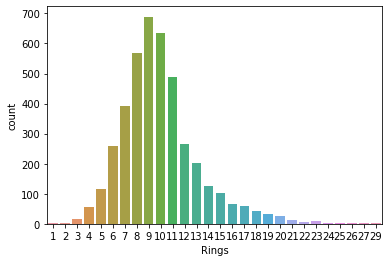

In [19]:
# Plot diagnosis frequencies
sns.countplot ( abalone_data [ 'Rings' ],label = "Count" ) # boxplot

In [20]:
def describe_by_category ( data, numeric, categorical, transpose = False ):
    grouped = data.groupby ( categorical )
    grouped_y = grouped [ numeric ].describe()
    if transpose:
        print( grouped_y.transpose() )
    else:
        print ( grouped_y )

In [21]:
# Descriptive Statistics: Describe each variable by 'Rings' (means only)
abalone_data.groupby ( [ 'Rings' ] )[ "Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight" ].mean()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Rings,,,,,,,
1,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500
2,0.150000,0.100000,0.025000,0.015000,0.004500,0.004000,0.005000
3,0.176000,0.128667,0.041667,0.028400,0.011767,0.006267,0.008933
4,0.221491,0.161579,0.053947,0.059605,0.024719,0.012956,0.018000
5,0.285739,0.210696,0.069913,0.125500,0.061696,0.027330,0.036770
6,0.369363,0.278861,0.091776,0.273174,0.123158,0.058371,0.078388
7,0.422033,0.321535,0.105921,0.397386,0.182657,0.085899,0.111648
8,0.498776,0.384798,0.128556,0.640753,0.293773,0.138502,0.178609
9,0.546865,0.425218,0.142721,0.852013,0.387938,0.187803,0.236509


In [22]:
# Descriptive Statistics: Describe each variable by Rings
abalone_data.groupby ( [ 'Rings' ] )[ "Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight" ].describe()

Length                                                              \
       count      mean       std    min      25%     50%      75%    max   
Rings                                                                      
1        1.0  0.075000       NaN  0.075  0.07500  0.0750  0.07500  0.075   
2        1.0  0.150000       NaN  0.150  0.15000  0.1500  0.15000  0.150   
3       15.0  0.176000  0.034754  0.110  0.15750  0.1800  0.20000  0.240   
4       57.0  0.221491  0.049839  0.130  0.18500  0.2250  0.25000  0.360   
5      115.0  0.285739  0.060659  0.155  0.25000  0.2800  0.32000  0.440   
6      259.0  0.369363  0.075215  0.170  0.32000  0.3700  0.41500  0.660   
7      391.0  0.422033  0.076018  0.205  0.37000  0.4250  0.47500  0.720   
8      568.0  0.498776  0.079221  0.255  0.45000  0.5000  0.55500  0.720   
9      689.0  0.546865  0.082891  0.280  0.50000  0.5600  0.60500  0.745   
10     634.0  0.574629  0.085484  0.290  0.53000  0.5900  0.63000  0.770   
11     487.0  0.599374  0.086864  0.310  0.55000  0.6200  0.65500  0.780   
12     267.0  0.589457  0.089453  0.350  0.52000  0.6000  0.65000  0.775   
13     203.0  0.578892  0.085463  0.320  0.51500  0.5800  0.64500  0.760   
14     126.0  0.580198  0.079891  0.385  0.52500  0.5800  0.63000  0.815   
15     103.0  0.575728  0.069007  0.420  0.52000  0.5850  0.62750  0.710   
16      67.0  0.587537  0.077172  0.395  0.53500  0.5900  0.64500  0.740   
17      58.0  0.601034  0.069628  0.490  0.54000  0.5925  0.64875  0.775   
18      42.0  0.596071  0.072981  0.425  0.55000  0.6050  0.64500  0.745   
19      32.0  0.595625  0.067904  0.450  0.54375  0.5900  0.64875  0.705   
20      26.0  0.603654  0.057438  0.500  0.56500  0.5975  0.64625  0.725   
21      14.0  0.618214  0.075182  0.490  0.56875  0.6350  0.67000  0.735   
22       6.0  0.595000  0.054314  0.520  0.55500  0.6050  0.63625  0.655   
23       9.0  0.587222  0.102869  0.450  0.51500  0.6100  0.62000  0.800   
24       2.0  0.695000  0.007071  0.690  0.69250  0.6950  0.69750  0.700   
25       1.0  0.645000       NaN  0.645  0.64500  0.6450  0.64500  0.645   
26       1.0  0.600000       NaN  0.600  0.60000  0.6000  0.60000  0.600   
27       2.0  0.607500  0.081317  0.550  0.57875  0.6075  0.63625  0.665   
29       1.0  0.700000       NaN  0.700  0.70000  0.7000  0.70000  0.700   

      Diameter            ... Viscera weight         Shell weight            \
         count      mean  ...            75%     max        count      mean   
Rings                     ...                                                 
1          1.0  0.055000  ...       0.000500  0.0005          1.0  0.001500   
2          1.0  0.100000  ...       0.004000  0.0040          1.0  0.005000   
3         15.0  0.128667  ...       0.008750  0.0135         15.0  0.008933   
4         57.0  0.161579  ...       0.017000  0.0350         57.0  0.018000   
5        115.0  0.210696  ...       0.036250  0.0920        115.0  0.036770   
6        259.0  0.278861  ...       0.073500  0.2940        259.0  0.078388   
7        391.0  0.321535  ...       0.107250  0.3215        391.0  0.111648   
8        568.0  0.384798  ...       0.185500  0.3855        568.0  0.178609   
9        689.0  0.425218  ...       0.242000  0.5410        689.0  0.236509   
10       634.0  0.449290  ...       0.282750  0.5250        634.0  0.282976   
11       487.0  0.470595  ...       0.318000  0.5745        487.0  0.319866   
12       267.0  0.462434  ...       0.303250  0.7600        267.0  0.321157   
13       203.0  0.456453  ...       0.295500  0.5750        203.0  0.320828   
14       126.0  0.458294  ...       0.295125  0.5410        126.0  0.329960   
15       103.0  0.456262  ...       0.279500  0.4800        103.0  0.321650   
16        67.0  0.468433  ...       0.307500  0.4725         67.0  0.377858   
17        58.0  0.475345  ...       0.298000  0.4805         58.0  0.393414   
18        42.0  0.471310  ...       0.309875  0.4370         42.0  0.

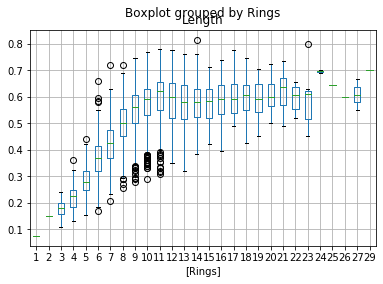

In [23]:
boxplot = abalone_data.boxplot ( column = [ 'Length'], by = [ 'Rings' ] )

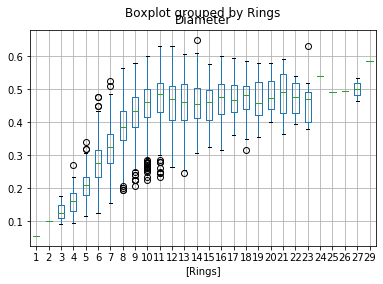

In [24]:
boxplot = abalone_data.boxplot ( column = [ "Diameter" ], by = [ 'Rings' ] ) 

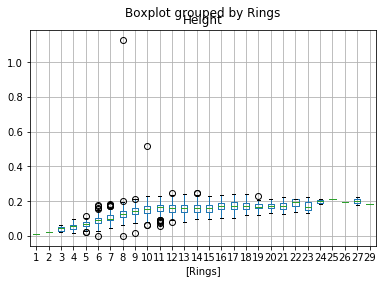

In [25]:
boxplot = abalone_data.boxplot ( column = [ "Height" ], by = [ 'Rings' ] ) 

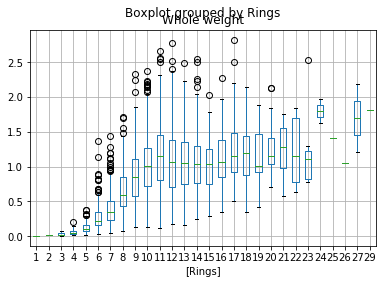

In [26]:
boxplot = abalone_data.boxplot ( column = [ "Whole weight" ], by = [ 'Rings' ] )

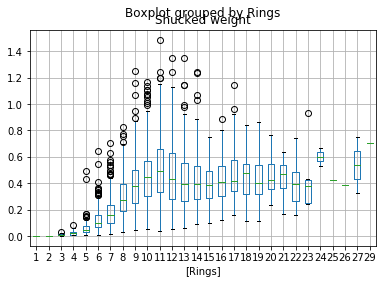

In [27]:
boxplot = abalone_data.boxplot ( column = [ "Shucked weight" ], by = [ 'Rings' ] )

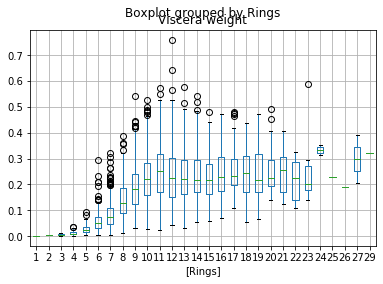

In [28]:
boxplot = abalone_data.boxplot ( column = [ "Viscera weight" ], by = [ 'Rings' ] ) 

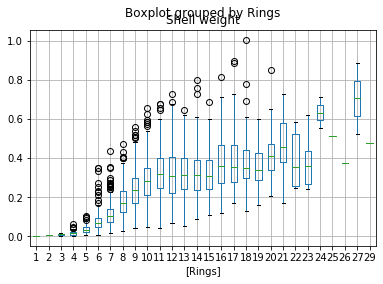

In [29]:
boxplot = abalone_data.boxplot ( column = [ "Shell weight" ], by = [ 'Rings' ] ) 

In [30]:
# Descriptive Statistics: Sex by Rings
describe_by_category ( abalone_data, "Sex", "Rings", transpose = True )  

Rings  1  2   3   4    5    6    7    8    9    10  ...  19  20  21 22 23 24  \
count   1  1  15  57  115  259  391  568  689  634  ...  32  26  14  6  9  2   
unique  1  1   2   2    3    3    3    3    3    3  ...   3   3   3  2  2  2   
top     I  I   I   I    I    I    I    I    M    M  ...   M   F   F  F  F  M   
freq    1  1  12  51  100  216  267  274  278  294  ...  15  12   7  3  6  1   

Rings  25 26 27 29  
count   1  1  2  1  
unique  1  1  2  1  
top     F  M  F  F  
freq    1  1  1  1  

[4 rows x 28 columns]


In [31]:
# Descriptive Statistics: Length by Rings
describe_by_category ( abalone_data, "Length", "Rings", transpose = True )

Rings     1     2          3          4           5           6           7   \
count  1.000  1.00  15.000000  57.000000  115.000000  259.000000  391.000000   
mean   0.075  0.15   0.176000   0.221491    0.285739    0.369363    0.422033   
std      NaN   NaN   0.034754   0.049839    0.060659    0.075215    0.076018   
min    0.075  0.15   0.110000   0.130000    0.155000    0.170000    0.205000   
25%    0.075  0.15   0.157500   0.185000    0.250000    0.320000    0.370000   
50%    0.075  0.15   0.180000   0.225000    0.280000    0.370000    0.425000   
75%    0.075  0.15   0.200000   0.250000    0.320000    0.415000    0.475000   
max    0.075  0.15   0.240000   0.360000    0.440000    0.660000    0.720000   

Rings          8           9           10  ...         19         20  \
count  568.000000  689.000000  634.000000  ...  32.000000  26.000000   
mean     0.498776    0.546865    0.574629  ...   0.595625   0.603654   
std      0.079221    0.082891    0.085484  ...   0.067904   0.0

In [32]:
# Descriptive Statistics: Diameter by Rings
describe_by_category ( abalone_data, "Diameter", "Rings", transpose = True ) 

Rings     1    2          3          4           5           6           7   \
count  1.000  1.0  15.000000  57.000000  115.000000  259.000000  391.000000   
mean   0.055  0.1   0.128667   0.161579    0.210696    0.278861    0.321535   
std      NaN  NaN   0.024014   0.038593    0.047327    0.060436    0.061779   
min    0.055  0.1   0.090000   0.095000    0.115000    0.125000    0.155000   
25%    0.055  0.1   0.110000   0.130000    0.180000    0.235000    0.275000   
50%    0.055  0.1   0.125000   0.160000    0.210000    0.275000    0.325000   
75%    0.055  0.1   0.150000   0.185000    0.235000    0.315000    0.365000   
max    0.055  0.1   0.175000   0.270000    0.340000    0.475000    0.525000   

Rings          8           9           10  ...         19         20  \
count  568.000000  689.000000  634.000000  ...  32.000000  26.000000   
mean     0.384798    0.425218    0.449290  ...   0.470781   0.482308   
std      0.064936    0.067655    0.069442  ...   0.062141   0.053614   


In [33]:
# Descriptive Statistics: Height by Rings
describe_by_category ( abalone_data, "Height", "Rings", transpose = True ) 

Rings    1      2          3          4           5           6           7   \
count  1.00  1.000  15.000000  57.000000  115.000000  259.000000  391.000000   
mean   0.01  0.025   0.041667   0.053947    0.069913    0.091776    0.105921   
std     NaN    NaN   0.011443   0.017262    0.017270    0.022346    0.022607   
min    0.01  0.025   0.025000   0.015000    0.025000    0.000000    0.045000   
25%    0.01  0.025   0.030000   0.040000    0.060000    0.075000    0.090000   
50%    0.01  0.025   0.045000   0.055000    0.070000    0.090000    0.100000   
75%    0.01  0.025   0.050000   0.065000    0.080000    0.105000    0.120000   
max    0.01  0.025   0.065000   0.095000    0.115000    0.180000    0.185000   

Rings          8           9           10  ...         19         20  \
count  568.000000  689.000000  634.000000  ...  32.000000  26.000000   
mean     0.128556    0.142721    0.154093  ...   0.170313   0.173846   
std      0.048914    0.026542    0.031161  ...   0.022823   0.0

In [34]:
# Descriptive Statistics: Whole Weight by Rings
describe_by_category ( abalone_data, "Whole weight", "Rings", transpose = True ) 

Rings     1      2          3          4           5           6           7   \
count  1.000  1.000  15.000000  57.000000  115.000000  259.000000  391.000000   
mean   0.002  0.015   0.028400   0.059605    0.125500    0.273174    0.397386   
std      NaN    NaN   0.015851   0.038436    0.075864    0.179586    0.224239   
min    0.002  0.015   0.008000   0.010500    0.021000    0.023500    0.042500   
25%    0.002  0.015   0.016750   0.032000    0.072000    0.154750    0.225500   
50%    0.002  0.015   0.023000   0.049000    0.106000    0.223500    0.350500   
75%    0.002  0.015   0.038000   0.080500    0.161000    0.343500    0.508250   
max    0.002  0.015   0.066500   0.196000    0.376000    1.369500    1.445000   

Rings          8           9           10  ...         19         20  \
count  568.000000  689.000000  634.000000  ...  32.000000  26.000000   
mean     0.640753    0.852013    1.008748  ...   1.166797   1.251750   
std      0.296128    0.361927    0.416193  ...   0.393

In [35]:
# Descriptive Statistics: Shucked Weight by Rings
describe_by_category ( abalone_data, "Shucked weight", "Rings", transpose = True )

Rings     1       2          3          4           5           6   \
count  1.000  1.0000  15.000000  57.000000  115.000000  259.000000   
mean   0.001  0.0045   0.011767   0.024719    0.061696    0.123158   
std      NaN     NaN   0.007824   0.016766    0.065109    0.086183   
min    0.001  0.0045   0.002500   0.005000    0.007500    0.009000   
25%    0.001  0.0045   0.006500   0.012000    0.029000    0.065750   
50%    0.001  0.0045   0.008500   0.021000    0.044000    0.100000   
75%    0.001  0.0045   0.015250   0.034000    0.073500    0.159750   
max    0.001  0.0045   0.031000   0.087500    0.495000    0.641000   

Rings          7           8           9           10  ...         19  \
count  391.000000  568.000000  689.000000  634.000000  ...  32.000000   
mean     0.182657    0.293773    0.387938    0.447217  ...   0.440625   
std      0.111397    0.145127    0.182417    0.203039  ...   0.182201   
min      0.017000    0.031500    0.045500    0.053500  ...   0.114500   
25% 

In [36]:
# Descriptive Statistics: Viscera weight by Rings
describe_by_category ( abalone_data, "Viscera weight", "Rings", transpose = True )

Rings      1      2          3          4           5           6   \
count  1.0000  1.000  15.000000  57.000000  115.000000  259.000000   
mean   0.0005  0.004   0.006267   0.012956    0.027330    0.058371   
std       NaN    NaN   0.003406   0.008613    0.016693    0.038566   
min    0.0005  0.004   0.002000   0.000500    0.003500    0.005500   
25%    0.0005  0.004   0.003750   0.006500    0.016000    0.032250   
50%    0.0005  0.004   0.005500   0.010000    0.023000    0.049500   
75%    0.0005  0.004   0.008750   0.017000    0.036250    0.073500   
max    0.0005  0.004   0.013500   0.035000    0.092000    0.294000   

Rings          7           8           9           10  ...         19  \
count  391.000000  568.000000  689.000000  634.000000  ...  32.000000   
mean     0.085899    0.138502    0.187803    0.223128  ...   0.248859   
std      0.050590    0.067768    0.083849    0.095244  ...   0.104212   
min      0.005500    0.013500    0.029500    0.026000  ...   0.066500   
25% 

In [37]:
# Descriptive Statistics: Shell weight by Rings
describe_by_category ( abalone_data, "Shell weight", "Rings", transpose = True )

Rings      1      2          3          4           5           6   \
count  1.0000  1.000  15.000000  57.000000  115.000000  259.000000   
mean   0.0015  0.005   0.008933   0.018000    0.036770    0.078388   
std       NaN    NaN   0.004379   0.012419    0.020341    0.050190   
min    0.0015  0.005   0.003000   0.003500    0.005000    0.008000   
25%    0.0015  0.005   0.005000   0.009000    0.022500    0.045000   
50%    0.0015  0.005   0.010000   0.015000    0.033000    0.070000   
75%    0.0015  0.005   0.011750   0.021500    0.045750    0.094750   
max    0.0015  0.005   0.017000   0.064000    0.101500    0.350500   

Rings          7           8           9           10  ...         19  \
count  391.000000  568.000000  689.000000  634.000000  ...  32.000000   
mean     0.111648    0.178609    0.236509    0.282976  ...   0.365313   
std      0.056666    0.075504    0.091707    0.106811  ...   0.108382   
min      0.015500    0.027000    0.040000    0.045000  ...   0.160000   
25% 

## Decision Tree: Abalone Data

### Assign Feature Matrix & Target Vector

In [38]:
# Assign Variables
# X = Feature Matrix; All Attributes (i.e., drop instance class column)
# y = Target Vector; Categorical instance class (i.e., doesn't include the attribute features)
X_abalone = abalone_data.drop ( [ "Rings" ], axis = 1 ).values
y_abalone = abalone_data [ "Rings" ].values

### Run Classification Experiment
### ID3 Algorithm

In [39]:
# Decision Tree Classification: Abalone Data
# ID3 Algorithm

if __name__ == "__main__":
    import time
    t = time.time()

# Log Experiment: Decision Tree Classification on Abalone Data Using ID3 Algorithm
logger.info ( "Running Abalone Ring Experiment: Decision Tree Classification using ID3 Algorithm" )

# Run Classification Experiment (ID3 Algorithm)
experiment_results = run_classification_experiment (
    feature_matrix = X_abalone,
    target_array = y_abalone,
    colmap = {
            i: "continuous" if i != 0 else "discrete" for i in range ( X_abalone.shape [ 1 ] )
        },
    ) # End experiment

# Log Experiment Accuracy
logger.info ( { k: accuracy ( v [ "actuals" ], v [ "preds" ] ) for k, v in experiment_results.items() } ) 
# End logging accuracy results

# Car Evaluation Data Set
## Extract, Transform, Load: Car Evaluation Data


### Description

A data set to evaluate cars. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples

Data obtained from: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

### Attribute Information: 6 Attributes (d)

1. buying: Indicates purchase price category (vhigh, high, med, low). Variable Type: Nominal/Categorical
2. maint: Indicates maintenance cost (vhigh, high, med, low). Variable Type: Nominal/Categorical
3. doors: Indicates number of doors (2, 3, 4, or 5+). Variable Type: Integer/Categorical
4. persons: Indicates maximum passenger capacity (2, 4, more). Variable Type: Integer/Categorical
5. lug_boot: Indicates size of the luggage boot (small, med, big). Variable Type: Nominal/Categorical
6. safety: Indicates safety category of car (low, med, high). Variable Type: Nominal/Categorical

### One Class Label
7. acceptable (class attribute): Categorizes car as one of the following categories: unacceptable (unacc), acceptable (acc), good, or very good (vgood). Variable Type: Nominal/Categorical  

In [40]:
# Log ETL: Car Evaluation Data
logger.info ( "ETL: Car Evaluation Data Set" )

# Read Car Evaluation Data
# Create dataframe
car_data = pipe (
    pd.read_csv (
        "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
        header = None,
        names = [
            "buying",
            "maint",
            "doors",
            "persons",
            "lug_boot",
            "safety",
            "acceptable",
            ],
        )
    ).sample ( frac = 1 )

In [41]:
# Confirm data was properly read by examining data frame
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 1665 to 1093
Data columns (total 7 columns):
buying        1728 non-null object
maint         1728 non-null object
doors         1728 non-null object
persons       1728 non-null object
lug_boot      1728 non-null object
safety        1728 non-null object
acceptable    1728 non-null object
dtypes: object(7)
memory usage: 108.0+ KB


In [42]:
# Look at first few rows of dataframe
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,acceptable
1665,low,low,3,more,small,low,unacc
1675,low,low,4,2,small,med,unacc
1654,low,low,3,2,big,med,unacc
1455,low,high,3,more,big,low,unacc
996,med,high,2,more,big,low,unacc


In [43]:
# Verify whether any values are null
car_data.isnull().values.any()

False

In [44]:
# Again
car_data.isna().any()

buying        False
maint         False
doors         False
persons       False
lug_boot      False
safety        False
acceptable    False
dtype: bool

## (Brief) Exploratory Data Analysis: Car Evaluation Data

### Single Variables

Let's look at the summary statistics & Tukey's 5

In [45]:
# Log EDA: Car Evaluation Data
logger.info ( "EDA: Car Evaluation Data Set" )

# Descriptive Statistics
car_data.describe()

,buying,maint,doors,persons,lug_boot,safety,acceptable
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,more,big,high,unacc
freq,432,432,432,576,576,576,1210


In [46]:
# Frequency of classifications
car_data [ 'acceptable' ].value_counts() # raw counts

unacc    1210
acc       384
good       69
vgood      65
Name: acceptable, dtype: int64

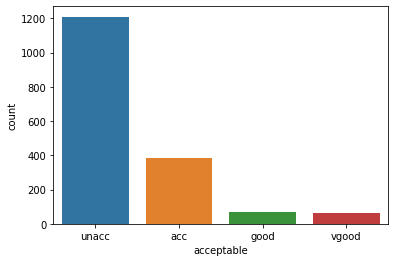

In [47]:
# Plot diagnosis frequencies
sns.countplot ( car_data [ 'acceptable' ],label = "Count" ) # boxplot

## Decision Tree: Car Evaluation Data

### Assign Feature Matrix & Target Vector

In [48]:
# Assign Variables
# X = Feature Matrix; All Attributes (i.e., drop instance class column)
# y = Target Vector; Categorical instance class (i.e., doesn't include the attribute features)
X_car_data = car_data.drop ( "acceptable", axis = 1 ).values
y_car_data = car_data [ "acceptable" ].values

### Run Classification Experiment
### ID3 Algorithm

In [49]:
# Decision Tree Classification: Car Evaluation Data

# Log Experiment: Decision Tree Classification on Car Evaluation Data using ID3 Algorithm
logger.info ( "Running Car Data Experiment: Decision Tree Classification using ID3 Algorithm" )

# Run Classification Experiment (ID3 Algorithm)
car_experiment_results = run_classification_experiment (
    feature_matrix = X_car_data,
    target_array = y_car_data,
    colmap = { i: "discrete" for i in range ( X_car_data.shape [ 1 ] ) },
) # End experiment

# Log Accuracy
logger.info(
    {
        k: accuracy ( v [ "actuals" ], v [ "preds" ] )
        for k, v in car_experiment_results.items()
    }
) # End logging accuracy

# Image Segmentation Data Set
## Extract, Transform, Load: Image Segmentation Data

### Description

[Classification] The instances were drawn randomly from a database of 7 outdoor images. The images
were handsegmented to create a classification for every pixel.

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Image+Segmentation

### Attribute Information: 19 Attributes (d)

1. region-centroid-col: the column of the center pixel of the region. 
2. region-centroid-row: the row of the center pixel of the region. 
3. region-pixel-count: the number of pixels in a region = 9. 
4. short-line-density-5: the results of a line extractoin algorithm that counts how many lines of length 5 (any orientation) with low contrast, less than or equal to 5, go through the region. 
5. short-line-density-2: same as short-line-density-5 but counts lines of high contrast, greater than 5. 
6. vedge-mean: measure the contrast of horizontally adjacent pixels in the region. There are 6, the mean and standard deviation are given. This attribute is used as a vertical edge detector. 
7. vegde-sd: (see 6) 
8. hedge-mean: measures the contrast of vertically adjacent pixels. Used for horizontal line detection. 
9. hedge-sd: (see 8). 
10. intensity-mean: the average over the region of (R + G + B)/3 
11. rawred-mean: the average over the region of the R value. 
12. rawblue-mean: the average over the region of the B value. 
13. rawgreen-mean: the average over the region of the G value. 
14. exred-mean: measure the excess red: (2R - (G + B)) 
15. exblue-mean: measure the excess blue: (2B - (G + R)) 
16. exgreen-mean: measure the excess green: (2G - (R + B)) 
17. value-mean: 3-d nonlinear transformation of RGB. (Algorithm can be found in Foley and VanDam, Fundamentals of Interactive Computer Graphics) 
18. saturatoin-mean: (see 17) 
19. hue-mean: (see 17)

### One Class Label
20. class (class attribute) 

In [50]:
# Log ETL: Image Segmentation Data
logger.info ( "ETL: Image Segmentation Data Set" )

# Read Image Segmentation Data
# Create dataframe
image_segmentation_data = pipe (
        r.get (
            "https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.data"
        ).text.split ( "\n" ),
        lambda lines: pd.read_csv (
            io.StringIO ( "\n".join ( lines [ 5: ] ) ), header = None, names = lines [ 3 ].split ( "," ) ),
        lambda df: df.assign (
            instance_class = lambda df: df.index.to_series().astype ( "category" ).cat.codes
        ), ).sample ( frac = 1 )

In [51]:
# Confirm data was properly read by examining data frame
image_segmentation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, CEMENT to PATH
Data columns (total 20 columns):
REGION-CENTROID-COL     210 non-null float64
REGION-CENTROID-ROW     210 non-null float64
REGION-PIXEL-COUNT      210 non-null int64
SHORT-LINE-DENSITY-5    210 non-null float64
SHORT-LINE-DENSITY-2    210 non-null float64
VEDGE-MEAN              210 non-null float64
VEDGE-SD                210 non-null float64
HEDGE-MEAN              210 non-null float64
HEDGE-SD                210 non-null float64
INTENSITY-MEAN          210 non-null float64
RAWRED-MEAN             210 non-null float64
RAWBLUE-MEAN            210 non-null float64
RAWGREEN-MEAN           210 non-null float64
EXRED-MEAN              210 non-null float64
EXBLUE-MEAN             210 non-null float64
EXGREEN-MEAN            210 non-null float64
VALUE-MEAN              210 non-null float64
SATURATION-MEAN         210 non-null float64
HUE-MEAN                210 non-null float64
instance_class          210 non-null int8

**Notes**

As expected, we see 20 columns (19 attributes & one class instance). There are 210 entries (n = 210). We see that the attribute/feature REGION-PIXEL-COUNT is an integer, but all other attributes are float type variables. 

In [52]:
# Look at first few rows of dataframe
image_segmentation_data.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,instance_class
CEMENT,130.0,32.0,9,0.0,0.0,1.111111,1.047041,0.833334,0.836659,59.481480,54.222220,70.888890,53.333332,-15.777778,34.222220,-18.444445,70.888890,0.249001,-2.042422,1
FOLIAGE,140.0,125.0,9,0.0,0.0,0.666667,0.222222,2.666667,3.777778,3.925926,1.555556,7.777778,2.444444,-7.111111,11.555555,-4.444445,7.777778,0.853199,-2.234241,2
BRICKFACE,96.0,84.0,9,0.0,0.0,1.500000,1.277777,1.611111,2.285188,23.851852,23.555555,30.000000,18.000000,-0.888889,18.444445,-17.555555,30.000000,0.398791,-1.598867,0
BRICKFACE,23.0,55.0,9,0.0,0.0,2.222222,3.674073,1.777777,0.785185,23.444445,21.666666,31.111110,17.555555,-5.333334,23.000000,-17.666666,31.111110,0.435070,-1.771163,0
FOLIAGE,67.0,136.0,9,0.0,0.0,6.722223,3.708349,2.666667,3.197221,15.518518,9.000000,25.333334,12.222222,-19.555555,29.444445,-9.888889,25.333334,0.660813,-2.307511,2


In [53]:
# Verify whether any values are null
image_segmentation_data.isnull().values.any()

False

In [54]:
# Again
image_segmentation_data.isna().any()

REGION-CENTROID-COL     False
REGION-CENTROID-ROW     False
REGION-PIXEL-COUNT      False
SHORT-LINE-DENSITY-5    False
SHORT-LINE-DENSITY-2    False
VEDGE-MEAN              False
VEDGE-SD                False
HEDGE-MEAN              False
HEDGE-SD                False
INTENSITY-MEAN          False
RAWRED-MEAN             False
RAWBLUE-MEAN            False
RAWGREEN-MEAN           False
EXRED-MEAN              False
EXBLUE-MEAN             False
EXGREEN-MEAN            False
VALUE-MEAN              False
SATURATION-MEAN         False
HUE-MEAN                False
instance_class          False
dtype: bool

## (Brief) Exploratory Data Analysis: Image Segmentation Data

### Single Variables

Let's look at the summary statistics & Tukey's 5

In [55]:
# Log EDA: Image Segmentation Data
logger.info ( "EDA: Image Segmentation Data Set" )

# Descriptive Statistics
image_segmentation_data.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,instance_class
count,210.000000,210.000000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,124.647619,122.757143,9.0,0.008466,0.006349,1.925132,5.719529,2.604233,11.638377,37.091005,32.967725,44.011112,34.294180,-12.369841,20.760317,-8.390476,44.888360,0.423230,-1.340397,3.000000
std,74.104024,58.139686,0.0,0.029549,0.030077,3.158211,43.495942,4.798268,97.390023,38.677168,35.540563,43.804447,37.057003,11.559599,18.761842,11.003746,43.235182,0.227333,1.559405,2.004779
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.222220,-9.666667,-30.555555,0.000000,0.000000,-2.530950,0.000000
25%,60.500000,81.500000,9.0,0.000000,0.000000,0.666667,0.400921,0.777779,0.410816,6.453704,7.000000,8.277778,3.805555,-18.111110,4.111111,-15.750000,10.527778,0.275722,-2.187112,1.000000
50%,123.500000,121.500000,9.0,0.000000,0.000000,1.222222,0.828695,1.388889,0.913176,21.314816,18.611112,26.833334,20.000000,-10.333333,19.555556,-9.888889,28.388890,0.365455,-2.044163,3.000000
75%,189.750000,174.500000,9.0,0.000000,0.000000,1.888890,1.676634,2.597221,1.980485,52.629629,46.750000,64.194447,46.472223,-4.666666,34.333332,-3.722222,64.194447,0.539738,-1.429800,5.000000
max,252.000000,250.000000,9.0,0.111111,0.222222,25.500000,572.996400,44.722225,1386.329200,143.444440,136.888890,150.888890,142.555560,5.777778,78.777780,21.888890,150.888890,1.000000,2.864931,6.000000


**Notes** 

Total number of observations: 210 (i.e., n = 210)

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$

We'll likely want to discretize these attributes by class

## (Brief) Exploratory Data Analysis: Image Segmentation Data

### Pair-Wise: Attribute by Class

In [56]:
# Rename column
image_segmentation_data.rename ( columns = { "instance_class":"class" }, inplace = True )

In [57]:
# Frequency of glass classifications
image_segmentation_data [ 'class' ].value_counts() # raw counts

6    30
5    30
4    30
3    30
2    30
1    30
0    30
Name: class, dtype: int64

**Notes**

There are 7 image segmentation classifications (labeled 0, 1, 2, 3, .., 7)

Each image segmentation classification has 30 observations 


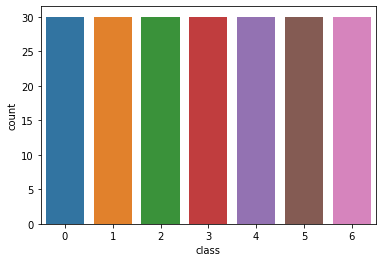

In [58]:
# Plot diagnosos frequencies
sns.countplot ( image_segmentation_data [ 'class' ],label = "Count" ) # boxplot

**Notes**

There are 7 image segmentation classifications (labeled 0, 1, 2, 3, .., 7)

Each image segmentation classification has 30 observations 

In [59]:
# Get column names
print ( image_segmentation_data.columns )

Index(['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT',
       'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN',
       'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN',
       'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN',
       'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN', 'class'],
      dtype='object')


In [60]:
# Descriptive Statistics: Describe each variable by class (means only)
image_segmentation_data.groupby ( [ 'class' ] )[ 'REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT',
       'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN',
       'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN',
       'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN',
       'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN' ].mean()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
class,,,,,,,,,,,,,,,,,,,
0,83.400000,109.333333,9,0.003704,0.000000,1.037037,1.030864,1.337037,0.851605,13.165432,13.611111,16.577778,9.307408,1.337037,10.237037,-11.574074,16.866667,0.488673,-1.298357
1,150.500000,97.166667,9,0.007407,0.007407,2.951852,2.435264,2.564815,3.792083,43.546914,39.048148,53.318518,38.274074,-13.496296,29.314814,-15.818518,53.318518,0.304401,-2.016035
2,76.500000,111.400000,9,0.003704,0.014815,3.827778,30.905793,5.290741,58.966017,10.992593,7.781482,15.848148,9.348148,-9.633333,14.566667,-4.933333,15.892592,0.761842,-2.245616
3,130.700000,203.500000,9,0.025926,0.000000,1.507407,1.973017,2.142593,2.064246,14.977778,11.911111,13.614815,19.407407,-9.200000,-4.088889,13.288889,19.418519,0.410565,2.287770
4,150.166667,187.233333,9,0.011111,0.022222,2.400000,2.118180,4.620370,10.015903,49.491358,43.992593,61.225927,43.255556,-16.496296,35.203704,-18.707407,61.229631,0.295645,-2.069752
5,116.400000,45.866667,9,0.007407,0.000000,0.831481,0.580651,1.137037,0.798594,119.069135,108.018520,135.174076,114.014814,-33.151852,48.314815,-15.162963,135.174076,0.205044,-2.324039
6,164.866667,104.800000,9,0.000000,0.000000,0.920370,0.992935,1.137037,4.980188,8.393827,6.411111,12.318519,6.451852,-5.948148,11.774074,-5.825926,12.318519,0.496441,-1.716752


In [61]:
# Descriptive Statistics: Describe each variable by class (all variables)
image_segmentation_data.groupby ( [ 'class' ] ) [ 'REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT',
       'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN',
       'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN',
       'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN',
       'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN' ].describe()        

REGION-CENTROID-COL                                                      \
                    count        mean        std   min     25%    50%     75%   
class                                                                           
0                    30.0   83.400000  63.719536   2.0   23.00   82.5  133.75   
1                    30.0  150.500000  64.834404  14.0  121.00  162.5  195.50   
2                    30.0   76.500000  63.572793   1.0   37.25   59.0   99.25   
3                    30.0  130.700000  80.616654   2.0   62.25  110.0  203.00   
4                    30.0  150.166667  74.075490   4.0   92.25  159.0  211.75   
5                    30.0  116.400000  58.638342   7.0   70.25  121.0  155.00   
6                    30.0  164.866667  67.389109  20.0  127.75  187.5  219.00   

             REGION-CENTROID-ROW              ... SATURATION-MEAN            \
         max               count        mean  ...             75%       max   
class                                         ...                             
0      229.0                30.0  109.333333  ...        0.558929  0.600529   
1      243.0                30.0   97.166667  ...        0.328997  0.503086   
2      231.0                30.0  111.400000  ...        0.966527  1.000000   
3      242.0                30.0  203.500000  ...        0.446163  0.593150   
4      252.0                30.0  187.233333  ...        0.307032  0.318137   
5      228.0                30.0   45.866667  ...        0.247667  0.362062   
6      252.0                30.0  104.800000  ...        0.664947  0.977778   

      HUE-MEAN                                                              \
         count      mean       std       min       25%       50%       75%   
class                                                                        
0         30.0 -1.298357  0.369146 -1.985703 -1.617118 -1.246602 -0.995541   
1         30.0 -2.016035  0.112343 -2.237972 -2.103675 -2.018119 -1.964688   
2         30.0 -2.245616  0.166026 -2.530950 -2.359557 -2.235901 -2.151303   
3         30.0  2.287770  0.269387  1.756645  2.100468  2.310683  2.452260   
4         30.0 -2.069752  0.110092 -2.517490 -2.082760 -2.048251 -2.006819   
5         30.0 -2.324039  0.089314 -2.521648 -2.376067 -2.338527 -2.266181   
6         30.0 -1.716752  0.786907 -2.202667 -2.128733 -2.053348 -1.924017   

                 
            max  
class            
0     -0.570940  
1     -1.681589  
2     -1.702833  
3      2.864931  
4     -1.947472  
5     -2.097815  
6      0.000000  

[7 rows x 152 columns]

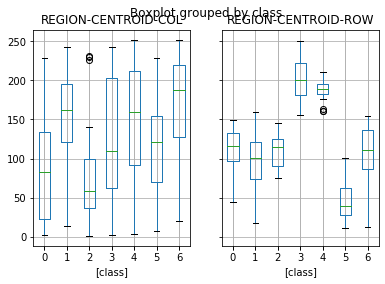

In [62]:
boxplot = image_segmentation_data.boxplot ( column = [ 'REGION-CENTROID-COL', 'REGION-CENTROID-ROW' ], by = [ 'class' ] )  

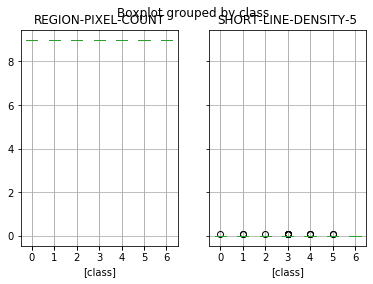

In [63]:
boxplot = image_segmentation_data.boxplot ( column = [ 'REGION-PIXEL-COUNT','SHORT-LINE-DENSITY-5' ], by = [ 'class' ] )

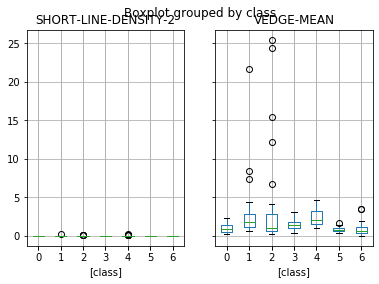

In [64]:
boxplot = image_segmentation_data.boxplot ( column = [ 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN' ], by = [ 'class' ] )

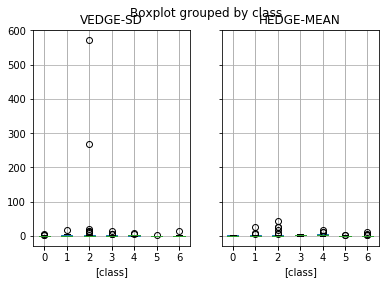

In [65]:
boxplot = image_segmentation_data.boxplot ( column = [ 'VEDGE-SD', 'HEDGE-MEAN' ], by = [ 'class' ] )

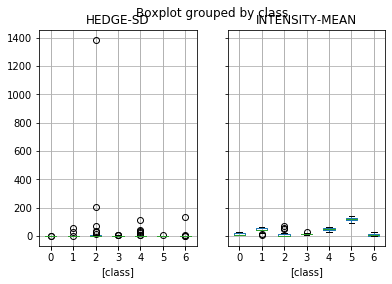

In [66]:
boxplot = image_segmentation_data.boxplot ( column = [ 'HEDGE-SD', 'INTENSITY-MEAN'], by = [ 'class' ] )

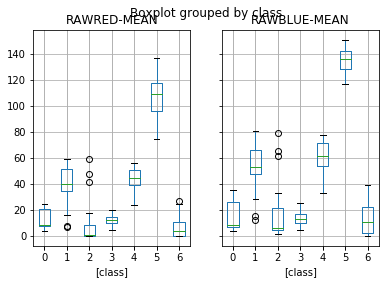

In [67]:
boxplot = image_segmentation_data.boxplot ( column = [ 'RAWRED-MEAN','RAWBLUE-MEAN' ], by = [ 'class' ] )

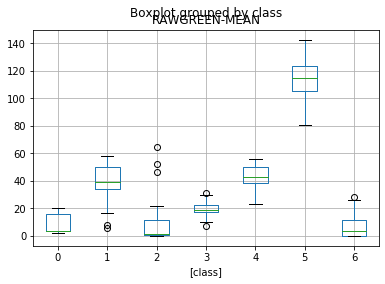

In [68]:
boxplot = image_segmentation_data.boxplot ( column = [ 'RAWGREEN-MEAN' ], by = [ 'class' ] )

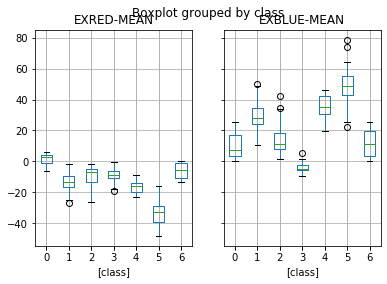

In [69]:
boxplot = image_segmentation_data.boxplot ( column = [ 'EXRED-MEAN', 'EXBLUE-MEAN' ], by = [ 'class' ] )

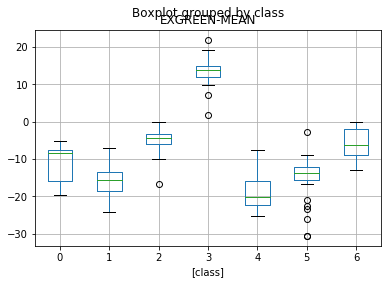

In [70]:
boxplot = image_segmentation_data.boxplot ( column = [ 'EXGREEN-MEAN'], by = [ 'class' ] )

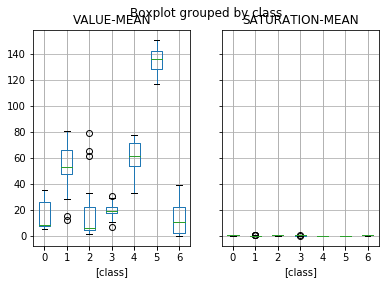

In [71]:
boxplot = image_segmentation_data.boxplot ( column = [ 'VALUE-MEAN', 'SATURATION-MEAN' ], by = [ 'class' ] )

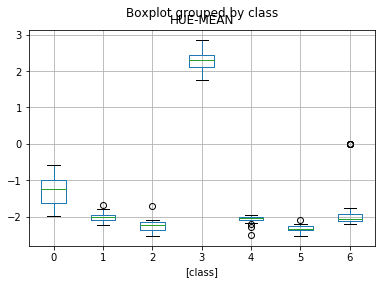

In [72]:
boxplot = image_segmentation_data.boxplot ( column = [ 'HUE-MEAN' ], by = [ 'class' ] )

In [73]:
# Descriptive Statistics: Describe each variable by class
# REGION-CENTROID-COL by Class
describe_by_category ( image_segmentation_data, 'REGION-CENTROID-COL', "class", transpose = True )

class           0           1           2           3           4           5  \
count   30.000000   30.000000   30.000000   30.000000   30.000000   30.000000   
mean    83.400000  150.500000   76.500000  130.700000  150.166667  116.400000   
std     63.719536   64.834404   63.572793   80.616654   74.075490   58.638342   
min      2.000000   14.000000    1.000000    2.000000    4.000000    7.000000   
25%     23.000000  121.000000   37.250000   62.250000   92.250000   70.250000   
50%     82.500000  162.500000   59.000000  110.000000  159.000000  121.000000   
75%    133.750000  195.500000   99.250000  203.000000  211.750000  155.000000   
max    229.000000  243.000000  231.000000  242.000000  252.000000  228.000000   

class           6  
count   30.000000  
mean   164.866667  
std     67.389109  
min     20.000000  
25%    127.750000  
50%    187.500000  
75%    219.000000  
max    252.000000  


In [74]:
# Descriptive Statistics: Describe each variable by class
# REGION-CENTROID-ROW by Class
describe_by_category ( image_segmentation_data, 'REGION-CENTROID-ROW', "class", transpose = True )

class           0           1          2           3           4           5  \
count   30.000000   30.000000   30.00000   30.000000   30.000000   30.000000   
mean   109.333333   97.166667  111.40000  203.500000  187.233333   45.866667   
std     29.039015   38.979290   21.46304   26.694633   11.527129   25.605405   
min     44.000000   17.000000   75.00000  156.000000  161.000000   11.000000   
25%     96.500000   74.250000   90.25000  181.500000  182.250000   27.500000   
50%    116.000000  100.500000  115.00000  200.000000  189.000000   39.500000   
75%    132.000000  120.750000  125.00000  222.500000  194.750000   62.000000   
max    149.000000  160.000000  145.00000  250.000000  210.000000  101.000000   

class           6  
count   30.000000  
mean   104.800000  
std     39.304646  
min     12.000000  
25%     86.000000  
50%    110.500000  
75%    136.250000  
max    155.000000  


In [75]:
# Descriptive Statistics: Describe each variable by class
# REGION-PIXEL-COUNT by Class
describe_by_category ( image_segmentation_data, 'REGION-PIXEL-COUNT', "class", transpose = True )

class     0     1     2     3     4     5     6
count  30.0  30.0  30.0  30.0  30.0  30.0  30.0
mean    9.0   9.0   9.0   9.0   9.0   9.0   9.0
std     0.0   0.0   0.0   0.0   0.0   0.0   0.0
min     9.0   9.0   9.0   9.0   9.0   9.0   9.0
25%     9.0   9.0   9.0   9.0   9.0   9.0   9.0
50%     9.0   9.0   9.0   9.0   9.0   9.0   9.0
75%     9.0   9.0   9.0   9.0   9.0   9.0   9.0
max     9.0   9.0   9.0   9.0   9.0   9.0   9.0


In [76]:
# Descriptive Statistics: Describe each variable by class
# SHORT-LINE-DENSITY-5 by Class
describe_by_category ( image_segmentation_data, 'SHORT-LINE-DENSITY-5', "class", transpose = True )

class          0          1          2          3          4          5     6
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000  30.0
mean    0.003704   0.007407   0.003704   0.025926   0.011111   0.007407   0.0
std     0.020286   0.028190   0.020286   0.047798   0.033903   0.028190   0.0
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.0
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.0
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.0
75%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.0
max     0.111111   0.111111   0.111111   0.111111   0.111111   0.111111   0.0


In [77]:
# Descriptive Statistics: Describe each variable by class
# SHORT-LINE-DENSITY-2 by Class
describe_by_category ( image_segmentation_data, 'SHORT-LINE-DENSITY-2', "class", transpose = True )

class     0          1          2     3          4     5     6
count  30.0  30.000000  30.000000  30.0  30.000000  30.0  30.0
mean    0.0   0.007407   0.014815   0.0   0.022222   0.0   0.0
std     0.0   0.040572   0.038416   0.0   0.053804   0.0   0.0
min     0.0   0.000000   0.000000   0.0   0.000000   0.0   0.0
25%     0.0   0.000000   0.000000   0.0   0.000000   0.0   0.0
50%     0.0   0.000000   0.000000   0.0   0.000000   0.0   0.0
75%     0.0   0.000000   0.000000   0.0   0.000000   0.0   0.0
max     0.0   0.222222   0.111111   0.0   0.222222   0.0   0.0


In [78]:
# Descriptive Statistics: Describe each variable by class
# VEDGE-MEAN by Class
describe_by_category ( image_segmentation_data, 'VEDGE-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    1.037037   2.951852   3.827778   1.507407   2.400000   0.831481   
std     0.612821   3.973189   6.696062   0.736122   1.053325   0.315447   
min     0.277778   0.666667   0.222222   0.444444   1.055555   0.333335   
25%     0.513889   1.138889   0.666667   1.013889   1.611112   0.611111   
50%     0.888889   1.861112   0.972222   1.444444   2.055556   0.777775   
75%     1.486111   2.861112   2.916666   1.861111   3.263890   1.000001   
max     2.277778  21.666666  25.500000   3.055556   4.611111   1.666667   

class          6  
count  30.000000  
mean    0.920370  
std     0.887173  
min     0.000000  
25%     0.347222  
50%     0.694444  
75%     1.194445  
max     3.444445  


In [79]:
# Descriptive Statistics: Describe each variable by class
# VEDGE-SD by Class
describe_by_category ( image_segmentation_data, 'VEDGE-SD', "class", transpose = True )

class          0          1           2          3          4          5  \
count  30.000000  30.000000   30.000000  30.000000  30.000000  30.000000   
mean    1.030864   2.435264   30.905793   1.973017   2.118180   0.580651   
std     1.266567   3.294970  113.297318   3.045898   1.499503   0.343513   
min     0.018518   0.177777    0.029630   0.077778   0.729634   0.029629   
25%     0.166667   0.775397    0.229630   0.554629   1.152977   0.354495   
50%     0.503704   1.247911    0.702768   0.890741   1.674422   0.531424   
75%     1.286110   3.459386    3.277777   1.760185   2.283369   0.724997   
max     5.351850  17.362800  572.996400  15.262960   7.662959   1.466670   

class          6  
count  30.000000  
mean    0.992935  
std     2.414415  
min     0.000000  
25%     0.256235  
50%     0.438528  
75%     0.957971  
max    13.496301  


In [80]:
# Descriptive Statistics: Describe each variable by class
# 'HEDGE-MEAN' by Class
describe_by_category ( image_segmentation_data, 'HEDGE-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    1.337037   2.564815   5.290741   2.142593   4.620370   1.137037   
std     0.804009   4.767299  10.265533   0.945704   3.623691   0.619626   
min     0.333333   0.666667   0.111111   0.611111   1.277779   0.388892   
25%     0.680556   0.958334   0.791667   1.444444   2.430556   0.777778   
50%     1.055556   1.305556   1.194444   2.055556   3.416666   0.944445   
75%     1.777778   2.000000   2.666667   2.791667   5.069444   1.375001   
max     2.944444  26.444445  44.722225   4.722222  18.166666   2.888891   

class          6  
count  30.000000  
mean    1.137037  
std     2.180535  
min     0.000000  
25%     0.222222  
50%     0.472222  
75%     0.888889  
max    10.777778  


In [81]:
# Descriptive Statistics: Describe each variable by class
# HEDGE-SD by Class
describe_by_category ( image_segmentation_data, 'HEDGE-SD', "class", transpose = True )

class          0          1            2          3           4          5  \
count  30.000000  30.000000    30.000000  30.000000   30.000000  30.000000   
mean    0.851605   3.792083    58.966017   2.064246   10.015903   0.798594   
std     0.816941  11.456546   253.733905   1.735255   22.331095   0.883829   
min     0.077778   0.296295     0.029630   0.389683    1.088663   0.077778   
25%     0.302778   0.653459     0.367588   0.822222    1.675492   0.355722   
50%     0.498148   0.870239     1.007407   1.725927    2.333060   0.633333   
75%     1.169444   1.508613     3.632639   2.375320    3.124129   0.916056   
max     3.185185  59.540750  1386.329200   7.599998  114.596340   5.051852   

class           6  
count   30.000000  
mean     4.980188  
std     23.971840  
min      0.000000  
25%      0.156922  
50%      0.344355  
75%      0.673687  
max    131.807390  


In [82]:
# Descriptive Statistics: Describe each variable by class
# INTENSITY-MEAN by Class
describe_by_category ( image_segmentation_data, 'INTENSITY-MEAN', "class", transpose = True )

class          0          1          2          3          4           5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000   30.000000   
mean   13.165432  43.546914  10.992593  14.977778  49.491358  119.069135   
std     8.144303  15.339119  17.288459   5.068777   9.216693   13.331206   
min     3.925926   8.444445   0.518518   6.407407  26.444445   90.629630   
25%     6.037037  39.203704   1.842593  12.629629  43.342593  109.925926   
50%     6.574074  44.814815   2.962963  15.092593  49.611110  119.018520   
75%    21.037038  56.370371  14.759259  17.101852  57.314814  127.907408   
max    26.740740  65.703705  67.444440  25.444445  63.222220  143.444440   

class          6  
count  30.000000  
mean    8.393827  
std     9.120666  
min     0.000000  
25%     0.851852  
50%     6.333333  
75%    14.435186  
max    31.629630  


In [83]:
# Descriptive Statistics: Describe each variable by class
# RAWRED-MEAN by Class
describe_by_category ( image_segmentation_data, 'RAWRED-MEAN', "class", transpose = True )

class          0          1          2          3          4           5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000   30.000000   
mean   13.611111  39.048148   7.781482  11.911111  43.992593  108.018520   
std     7.231603  14.356932  15.142842   4.015127   8.156198   15.846919   
min     4.111111   7.000000   0.000000   4.888889  23.444445   74.555560   
25%     7.361111  34.222223   0.111111   9.805556  38.861113   96.249999   
50%     8.111111  39.944446   0.777778  12.222222  44.555555  109.333333   
75%    20.916666  51.583333   8.666667  14.222223  50.722222  117.750001   
max    24.666666  59.444443  58.777780  20.111110  56.222220  136.888890   

class          6  
count  30.000000  
mean    6.411111  
std     7.672586  
min     0.000000  
25%     0.361111  
50%     4.000000  
75%    10.555556  
max    27.222221  


In [84]:
# Descriptive Statistics: Describe each variable by class
# RAWBLUE-MEAN by Class
describe_by_category ( image_segmentation_data, 'RAWBLUE-MEAN', "class", transpose = True )

class          0          1          2          3          4           5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000   30.000000   
mean   16.577778  53.318518  15.848148  13.614815  61.225927  135.174076   
std    10.671112  17.849442  20.291059   5.599043  11.718477    9.437600   
min     4.000000  12.222222   1.222222   4.666667  33.000000  116.888885   
25%     7.250000  47.805556   4.722222  10.111111  53.805554  128.583337   
50%     8.444444  52.944445   6.388889  13.166666  61.166668  136.277780   
75%    26.472222  66.277777  21.638889  16.583334  71.249998  142.305562   
max    35.222220  80.333336  79.000000  25.444445  77.777780  150.888890   

class          6  
count  30.000000  
mean   12.318519  
std    11.812129  
min     0.000000  
25%     2.055556  
50%    10.888889  
75%    22.416667  
max    39.333336  


In [85]:
# Descriptive Statistics: Describe each variable by class
# RAWGREEN-MEAN by Class
describe_by_category ( image_segmentation_data, 'RAWGREEN-MEAN', "class", transpose = True )

class          0          1          2          3          4           5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000   30.000000   
mean    9.307408  38.274074   9.348148  19.407407  43.255556  114.014814   
std     6.599837  14.084998  16.638744   5.847162   7.841129   14.926777   
min     2.222222   6.111111   0.000000   7.000000  22.888890   80.444440   
25%     3.472222  33.972224   0.500000  17.305556  38.777778  104.944443   
50%     3.833333  39.222222   1.666667  18.888889  43.055555  114.388885   
75%    15.750000  49.805555  11.888889  22.305556  50.194444  123.472225   
max    20.333334  58.222220  64.555560  30.888890  55.666668  142.555560   

class          6  
count  30.000000  
mean    6.451852  
std     8.036419  
min     0.000000  
25%     0.166667  
50%     3.611111  
75%    11.277778  
max    28.333334  


In [86]:
# Descriptive Statistics: Describe each variable by class
# EXRED-MEAN by Class
describe_by_category ( image_segmentation_data, 'EXRED-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    1.337037 -13.496296  -9.633333  -9.200000 -16.496296 -33.151852   
std     3.663296   6.091940   7.897338   4.170729   3.716512   8.603487   
min    -6.222222 -26.888890 -26.000000 -19.111110 -23.222221 -48.222220   
25%    -1.222222 -16.277778 -13.305556 -10.944444 -19.777779 -39.416668   
50%     3.055556 -13.444444  -6.722222  -8.944444 -16.111111 -33.000000   
75%     4.166667  -9.444444  -4.666666  -6.055556 -14.027778 -28.805556   
max     5.777778  -1.888889  -1.555556  -0.555556  -9.000000 -15.888889   

class          6  
count  30.000000  
mean   -5.948148  
std     4.900955  
min   -13.555555  
25%   -10.833333  
50%    -5.722222  
75%    -1.305556  
max     0.000000  


In [87]:
# Descriptive Statistics: Describe each variable by class
# EXBLUE-MEAN by Class
describe_by_category ( image_segmentation_data, 'EXBLUE-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   10.237037  29.314814  14.566667  -4.088889  35.203704  48.314815   
std     7.834100   9.916556  10.821606   3.316484   7.670252  12.531853   
min     0.222222  10.333333   1.777778  -9.666667  19.666666  22.333334   
25%     3.416667  24.249999   7.888889  -5.833333  30.750000  43.083333   
50%     7.444445  28.055556  11.166666  -4.833333  35.277779  48.666666   
75%    17.277777  34.500001  18.361110  -2.083333  42.083332  54.972223   
max    25.444445  50.111110  42.111110   5.222222  46.111110  78.777780   

class          6  
count  30.000000  
mean   11.774074  
std     8.926619  
min     0.000000  
25%     3.361111  
50%    11.000000  
75%    19.500000  
max    25.666666  


In [88]:
# Descriptive Statistics: Describe each variable by class
# EXGREEN-MEAN by Class
describe_by_category ( image_segmentation_data, 'EXGREEN-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean  -11.574074 -15.818518  -4.933333  13.288889 -18.707407 -15.162963   
std     4.673875   4.445257   3.376048   3.584247   4.662604   6.121985   
min   -19.555555 -24.111110 -16.555555   1.777778 -25.222221 -30.555555   
25%   -15.972221 -18.611111  -5.888889  11.777778 -22.194443 -15.500000   
50%    -8.388889 -15.611111  -4.444445  13.722223 -20.055555 -13.666667   
75%    -7.583333 -13.472222  -3.194445  14.833334 -15.944445 -12.138889   
max    -5.111111  -7.000000  -0.222222  21.888890  -7.666666  -2.666667   

class          6  
count  30.000000  
mean   -5.825926  
std     4.131582  
min   -13.000000  
25%    -8.833334  
50%    -6.333333  
75%    -2.055555  
max     0.000000  


In [89]:
# Descriptive Statistics: Describe each variable by class
# VALUE-MEAN by Class
describe_by_category ( image_segmentation_data, 'VALUE-MEAN', "class", transpose = True )

class          0          1          2          3          4           5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000   30.000000   
mean   16.866667  53.318518  15.892592  19.418519  61.229631  135.174076   
std    10.394451  17.849442  20.307711   5.830418  11.714169    9.437600   
min     5.555555  12.222222   1.222222   7.222222  33.000000  116.888885   
25%     7.777778  47.805556   4.722222  17.305556  53.805554  128.583337   
50%     8.555556  52.944445   6.388889  18.888889  61.166668  136.277780   
75%    26.472222  66.277777  22.638890  22.305556  71.249998  142.305562   
max    35.222220  80.333336  79.000000  30.888890  77.777780  150.888890   

class          6  
count  30.000000  
mean   12.318519  
std    11.812129  
min     0.000000  
25%     2.055556  
50%    10.888889  
75%    22.416667  
max    39.333336  


In [90]:
# Descriptive Statistics: Describe each variable by class
# SATURATION-MEAN by Class
describe_by_category ( image_segmentation_data, 'SATURATION-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    0.488673   0.304401   0.761842   0.410565   0.295645   0.205044   
std     0.076974   0.084738   0.245555   0.085215   0.014553   0.064481   
min     0.368848   0.176156   0.251852   0.191049   0.263847   0.092773   
25%     0.409964   0.259029   0.603501   0.352525   0.286199   0.170174   
50%     0.531085   0.275031   0.863626   0.414564   0.298339   0.195374   
75%     0.558929   0.328997   0.966527   0.446163   0.307032   0.247667   
max     0.600529   0.503086   1.000000   0.593150   0.318137   0.362062   

class          6  
count  30.000000  
mean    0.496441  
std     0.279240  
min     0.000000  
25%     0.385351  
50%     0.520172  
75%     0.664947  
max     0.977778  


In [91]:
# Descriptive Statistics: Describe each variable by class
# HUE-MEAN by Class
describe_by_category ( image_segmentation_data, 'HUE-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   -1.298357  -2.016035  -2.245616   2.287770  -2.069752  -2.324039   
std     0.369146   0.112343   0.166026   0.269387   0.110092   0.089314   
min    -1.985703  -2.237972  -2.530950   1.756645  -2.517490  -2.521648   
25%    -1.617118  -2.103675  -2.359557   2.100468  -2.082760  -2.376067   
50%    -1.246602  -2.018119  -2.235901   2.310683  -2.048251  -2.338527   
75%    -0.995541  -1.964688  -2.151303   2.452260  -2.006819  -2.266181   
max    -0.570940  -1.681589  -1.702833   2.864931  -1.947472  -2.097815   

class          6  
count  30.000000  
mean   -1.716752  
std     0.786907  
min    -2.202667  
25%    -2.128733  
50%    -2.053348  
75%    -1.924017  
max     0.000000  


## Decision Tree: Image Segmentation Data

### Assign Feature Matrix & Target Vector

In [92]:
# Assign Variables
# X = Feature Matrix; All Attributes (i.e., drop instance class column)
# y = Target Vector; Categorical instance class (i.e., doesn't include the attribute features)
X_image_seg = image_segmentation_data.drop ( [ "class", "REGION-PIXEL-COUNT"], axis = 1 ).values
y_image_seg = image_segmentation_data [ "class" ].values

### Run Classification Experiment
### ID3 Algorithm

In [93]:
# Decision Tree Classification: Image Segmentation Data

# Log Experiment: Decision Tree Classification on Image Segmentation Data Using ID3 Algorithm
logger.info ( "Running Image Segmentation Experiment: Decision Tree Classification using ID3 Algorithm" )

# Run Classification Experiment Using ID3 Algorithm
image_seg_experiment_results = run_classification_experiment (
    feature_matrix = X_image_seg,
    target_array = y_image_seg,
    colmap = { i: "continuous" for i in range ( X_image_seg.shape [ 1 ] ) },
    ) # End experiment

# Log Experiment's Accuracy
logger.info(
    {
        k: accuracy ( v [ "actuals" ], v [ "preds" ] )
        for k, v in image_seg_experiment_results.items()
    }
) # End Logging Accuracy

# Wine Quality Data Set
## Extract, Transform, Load: Wine Quality Data

### Description

The goal is to model wine quality based on physicochemical tests. Can be used for classification or regression.
The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones)

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Attribute Information: 11 Attributes (d) based on physiochemnical tests

1. fixed acidity
2. volatile acidity 
3. citric acid 
4. residual sugar
5. chlorides
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density
9. pH 
10. sulphates 
11. alcohol 


### One Class Label (based on sensory data):
12. Quality (score between 0 and 10).

In [94]:
# Log ETL: Wine Quality Data
logger.info ( "ETL: Wine Quality Data Set" )

# Read Wine Quality Data
# Create dataframe & label columns
white_wine_data = pd.read_csv (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
    sep = ";",
)

red_wine_data = pd.read_csv (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    sep = ";",
)

# Concat datasets and create an indicator for the wine type.
wine_data = pd.concat ( [ white_wine_data.assign ( is_white = 1 ), red_wine_data.assign ( is_white = 0 ) ] ).sample ( frac = 1 )

In [95]:
# Confirm data was properly read by examining data frame
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 2909 to 4562
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
is_white                6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [96]:
# Verify whether any values are null
wine_data.isnull().values.any()

False

In [97]:
# Again
wine_data.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
is_white                False
dtype: bool

In [98]:
# Look at first few rows of dataframe
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white
2909,6.2,0.18,0.30,1.0,0.031,23.0,73.0,0.99032,3.23,0.52,11.3,6,1
2828,6.4,0.14,0.31,1.2,0.034,53.0,138.0,0.99084,3.38,0.35,11.5,7,1
4779,6.0,0.59,0.00,0.8,0.037,30.0,95.0,0.99032,3.10,0.40,10.9,4,1
676,5.9,0.29,0.25,12.0,0.057,48.0,224.0,0.99810,3.23,0.41,9.0,6,1
2988,7.2,0.19,0.31,6.3,0.034,17.0,103.0,0.99305,3.15,0.52,11.4,7,1


In [99]:
# Get column names
print ( wine_data.columns )

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'is_white'],
      dtype='object')


## (Brief) Exploratory Data Analysis: Wine Quality Data

### Single Variable

In [100]:
# Log EDA: Wine Quality Data
logger.info ( "EDA: Wine Quality Data Set" )

# Descriptive Statistics
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


## (Brief) Exploratory Data Analysis: Wine Quality Data

### Pair-Wise: Attribute by Class

In [101]:
# Frequency of diagnoses classifications
wine_data [ 'quality' ].value_counts() # raw counts

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

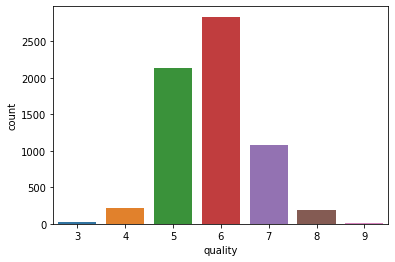

In [102]:
# Plot diagnosos frequencies
sns.countplot ( wine_data [ 'quality' ],label = "Count" ) # boxplot

## Decision Tree: Wine Quality Data

### Assign Feature Matrix & Target Vector

In [103]:
# Assign Variables
# X = Feature Matrix; All Attributes (i.e., drop instance class column)
# y = Target Vector; Categorical instance class (i.e., doesn't include the attribute features)
X_wine_data = wine_data.drop ( "quality", axis = 1 ).values
y_wine_data = wine_data [ "quality" ].values

### Run Regression Experiment
### CART Algorithm

In [104]:
# Decision Tree Regression: Wine Quality Data using CART Algorithm

# Log Experiment: Decision Tree Regression on Wine Quality Data using CART
logger.info ( "Running Wine Quality Experiment: Decision Tree Regression using CART Algorithm" )

# Run Regression Experiment using CART Algorithm
wine_experiment_results = run_regression_experiment (
    feature_matrix = X_wine_data, 
    target_array = y_wine_data, 
    early_stopping_values = np.linspace ( 0.2, 1, 4 )
) # End experiment

# Log Experiment Accuracy
logger.info (
    {
        k: mean_squared_error ( v [ "actuals" ], v [ "preds" ] )
        for k, v in wine_experiment_results.items()
    }
) # End logging accuracy

# Computer Hardware Data Set
## Extract, Transform, Load: Computer Hardware Data

### Description

[Regression] The estimated relative performance values were estimated by the authors using a linear
regression method. 

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Iris

### Attribute Information: 9 Attributes (d)

2. Model Name: many unique symbols 
3. MYCT: machine cycle time in nanoseconds (integer) 
4. MMIN: minimum main memory in kilobytes (integer) 
5. MMAX: maximum main memory in kilobytes (integer) 
6. CACH: cache memory in kilobytes (integer) 
7. CHMIN: minimum channels in units (integer) 
8. CHMAX: maximum channels in units (integer) 
9. PRP: published relative performance (integer) 
10. ERP: estimated relative performance from the original article (integer)

### One Class Label
1. Vendor Name (class):
    - adviser
    - amdah
    - apollo
    - basf
    - bti
    - burroughs
    - c.r.d
    - cambex
    - cdc
    - dec 
    - dg
    - formation
    - four-phase
    - gould
    - honeywell
    - hp
    - ibm
    - ipl
    - magnuson
    - microdata
    - nas
    - ncr
    - nixdorf
    - perkin-elmer
    - prime
    - siemens
    - sperry
    - sratus
    - wang

In [105]:
# Log ETL: Computer Hardware Data
logger.info ( "ETL: Computer Hardware Data Set" )

# Read Computer Hardware Data
# Create dataframe & label columns
computer_hardware_data = pd.read_csv (
        "https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data",
        header = None,
        names = [
            "vendor_name",
            "model_name",
            "MYCT",
            "MMIN",
            "MMAX",
            "CACH",
            "CHMIN",
            "CHMAX",
            "PRP",
            "ERP",
        ],
    )

In [106]:
# Confirm data was properly read by examining data frame
computer_hardware_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
vendor_name    209 non-null object
model_name     209 non-null object
MYCT           209 non-null int64
MMIN           209 non-null int64
MMAX           209 non-null int64
CACH           209 non-null int64
CHMIN          209 non-null int64
CHMAX          209 non-null int64
PRP            209 non-null int64
ERP            209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


**Notes**

As expected, we see 10 columns (9 attributes and 1 class label). There are 209 entries (n = 209). We see that the instance class (vendor_name) is an object, as is the model_name, but all other attributes are integer type variables.

In [107]:
# Verify whether any values are null
computer_hardware_data.isnull().values.any()

False

**Notes**

We observe no null instances

In [108]:
# Again
computer_hardware_data.isna().any()

vendor_name    False
model_name     False
MYCT           False
MMIN           False
MMAX           False
CACH           False
CHMIN          False
CHMAX          False
PRP            False
ERP            False
dtype: bool

**Notes**

We observe no null instances in any of the attribute columns

In [109]:
# Look at first few rows of dataframe
computer_hardware_data.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [110]:
# Classification for Class Label: data frame for this category
computer_hardware_data[ "vendor_name" ].astype ( "category" ).cat.codes

0       0
1       1
2       1
3       1
4       1
       ..
204    27
205    27
206    28
207    29
208    29
Length: 209, dtype: int8

## (Brief) Exploratory Data Analysis: Computer Hardware Data

### Single Variable

In [111]:
# Log EDA: Computer Hardware Data
logger.info ( "EDA: Computer Hardware Data Set" )

# Descriptive Statistics
computer_hardware_data.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


**Notes**

Total number of observations: 209

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$


## (Brief) Exploratory Data Analysis: Computer Hardware Data

### Pair-Wise: Attribute by Class

In [112]:
# Frequency of diagnoses classifications
computer_hardware_data [ 'vendor_name' ].value_counts() # raw counts

ibm             32
nas             19
ncr             13
honeywell       13
sperry          13
siemens         12
amdahl           9
cdc              9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
magnuson         6
ipl              6
prime            5
formation        5
cambex           5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
apollo           2
basf             2
adviser          1
sratus           1
four-phase       1
microdata        1
Name: vendor_name, dtype: int64

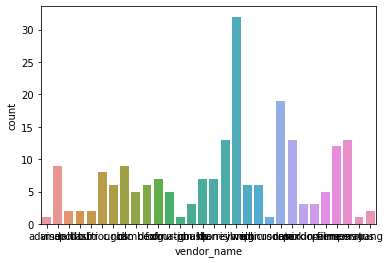

In [113]:
# Plot diagnosos frequencies
sns.countplot ( computer_hardware_data [ 'vendor_name' ],label = "Count" ) # boxplot

In [114]:
# Descriptive Statistics: Describe each variable by class (means only)
computer_hardware_data.groupby ( [ 'vendor_name' ] )[ "MYCT", "MMIN", "MMAX", "CACH","CHMIN", "CHMAX","PRP", "ERP" ].mean()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
vendor_name,,,,,,,,
adviser,125.000000,256.000000,6000.000000,256.000000,16.000000,128.000000,198.000000,199.000000
amdahl,26.000000,13333.333333,37333.333333,56.888889,13.333333,33.777778,416.333333,436.666667
apollo,400.000000,756.000000,3250.000000,2.000000,1.000000,4.000000,39.000000,23.500000
basf,55.000000,3000.000000,12000.000000,65.000000,1.000000,8.000000,115.000000,93.500000
bti,275.000000,288.000000,8032.000000,0.000000,2.500000,18.000000,22.500000,39.500000
burroughs,137.750000,2129.500000,4862.500000,18.750000,5.750000,38.375000,49.750000,44.625000
c.r.d,320.000000,320.000000,4500.000000,2.666667,1.000000,5.833333,42.666667,25.666667
cambex,50.000000,1600.000000,12000.000000,8.000000,3.000000,5.400000,42.800000,58.600000
cdc,46.666667,2426.666667,9126.666667,45.111111,8.333333,17.555556,130.111111,80.222222


In [115]:
# Descriptive Statistics: Describe each variable by class (means only)
computer_hardware_data.groupby ( [ 'vendor_name' ] )[ "MYCT", "MMIN", "MMAX", "CACH","CHMIN", "CHMAX","PRP", "ERP" ].describe()

MYCT                                                       \
             count        mean         std    min     25%    50%    75%   
vendor_name                                                               
adviser        1.0  125.000000         NaN  125.0  125.00  125.0  125.0   
amdahl         9.0   26.000000    3.000000   23.0   23.00   26.0   29.0   
apollo         2.0  400.000000    0.000000  400.0  400.00  400.0  400.0   
basf           2.0   55.000000    7.071068   50.0   52.50   55.0   57.5   
bti            2.0  275.000000  106.066017  200.0  237.50  275.0  312.5   
burroughs      8.0  137.750000   19.024420  110.0  134.75  143.0  143.0   
c.r.d          6.0  320.000000    0.000000  320.0  320.00  320.0  320.0   
cambex         5.0   50.000000    0.000000   50.0   50.00   50.0   50.0   
cdc            9.0   46.666667   13.143439   25.0   50.00   50.0   50.0   
dec            6.0  401.000000  324.090111  133.0  149.75  260.0  687.5   
dg             7.0  311.428571  268.727158  110.0  125.00  200.0  460.0   
formation      5.0  800.000000    0.000000  800.0  800.00  800.0  800.0   
four-phase     1.0  125.000000         NaN  125.0  125.00  125.0  125.0   
gould          3.0   75.000000    0.000000   75.0   75.00   75.0   75.0   
harris         7.0  282.857143   45.355737  180.0  300.00  300.0  300.0   
honeywell     13.0  208.461538   90.631686  140.0  140.00  140.0  300.0   
hp             7.0  104.285714   33.964267   75.0   82.50  105.0  105.0   
ibm           32.0  444.375000  458.530313   17.0   49.25  225.0  900.0   
ipl            6.0   50.000000    0.000000   50.0   50.00   50.0   50.0   
magnuson       6.0   75.000000   27.386128   50.0   50.00   75.0  100.0   
microdata      1.0  150.000000         NaN  150.0  150.00  150.0  150.0   
nas           19.0   64.421053   26.667325   30.0   40.00   60.0   83.5   
ncr           13.0   55.538462   21.481059   38.0   38.00   56.0   56.0   
nixdorf        3.0  200.000000    0.000000  200.0  200.00  200.0  200.0   
perkin-elmer   3.0  250.000000    0.000000  250.0  250.00  250.0  250.0   
prime          5.0  160.000000    0.000000  160.0  160.00  160.0  160.0   
siemens       12.0   92.750000   74.856378   26.0   45.50   64.5  105.0   
sperry        13.0  101.384615   62.055806   30.0   50.00   98.0  180.0   
sratus         1.0  125.000000         NaN  125.0  125.00  125.0  125.0   
wang           2.0  480.000000    0.000000  480.0  480.00  480.0  480.0   

                      MMIN                ...     PRP           ERP  \
                 max count          mean  ...     75%     max count   
vendor_name                               ...                         
adviser        125.0   1.0    256.000000  ...  198.00   198.0   1.0   
amdahl          29.0   9.0  13333.333333  ...  489.00  1144.0   9.0   
apollo         400.0   2.0    756.000000  ...   39.50    40.0   2.0   
basf            60.0   2.0   3000.000000  ...  126.50   138.0   2.0   
bti            350.0   2.0    288.000000  ...   28.75    35.0   2.0   
burroughs      167.0   8.0   2129.500000  ...   64.75   120.0   8.0   
c.r.d          320.0   6.0    320.000000  ...   60.00    77.0   6.0   
cambex          50.0   5.0   1600.000000  ...   52.00    60.0   5.0   
cdc             64.0   9.0   2426.666667  ...  208.00   368.0   9.0   
dec            810.0   6.0    756.000000  ...   69.50    72.0   6.0   
dg             700.0   7.0    805.714286  ...   65.50   138.0   7.0   
formation      800.0   5.0    256.000000  ...   20.00    22.0   5.0   
four-phase     125.0   1.0    512.000000  ...   36.00    36.0   1.0   
gould           75.0   3.0   2000.000000  ...  201.50   259.0   3.0   
harris         300.0   7.0    630.857143  ...   51.50    84.0   7.0   
honeywell      330.0  13.0   1615.384615  ...   66.00   189.0  13.0   
hp             175.0   7.0   1252.571429  ...   47.00    64.0   7.0   
ibm           1500.0  32.0   3014.750000  ...   82.00   465.0  32.0   
ipl             50.0   6.0   3000.000000  ...  

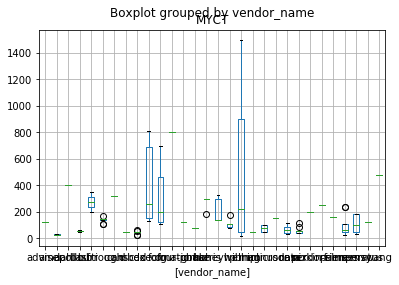

In [116]:
boxplot = computer_hardware_data.boxplot ( column = [ "MYCT" ], by = [ 'vendor_name' ] )

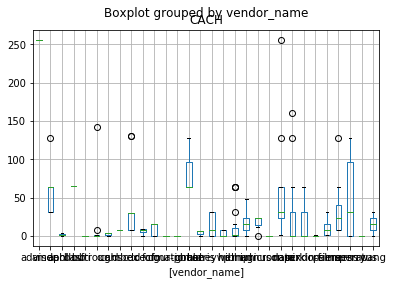

In [117]:
boxplot = computer_hardware_data.boxplot ( column = [ "CACH" ], by = [ 'vendor_name' ] )

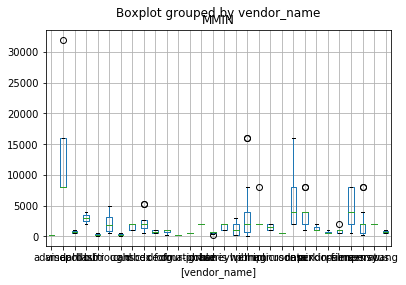

In [118]:
boxplot = computer_hardware_data.boxplot ( column = [ "MMIN" ], by = [ 'vendor_name' ] )

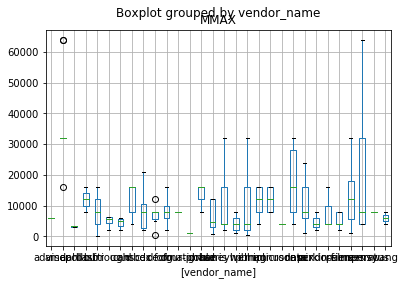

In [119]:
boxplot = computer_hardware_data.boxplot ( column = [ "MMAX" ], by = [ 'vendor_name' ] )

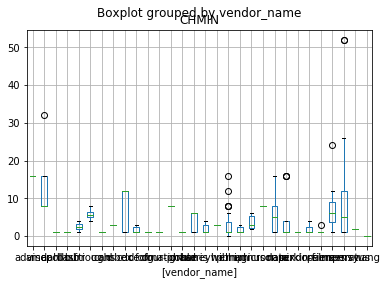

In [120]:
boxplot = computer_hardware_data.boxplot ( column = [ "CHMIN" ], by = [ 'vendor_name' ] )

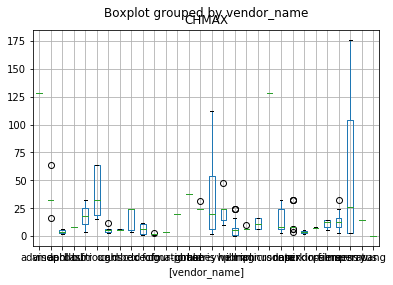

In [121]:
boxplot = computer_hardware_data.boxplot ( column = [ "CHMAX" ], by = [ 'vendor_name' ] )

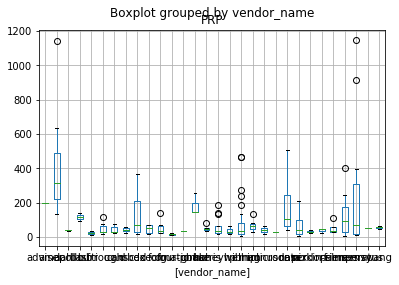

In [122]:
boxplot = computer_hardware_data.boxplot ( column = [ "PRP" ], by = [ 'vendor_name' ] )

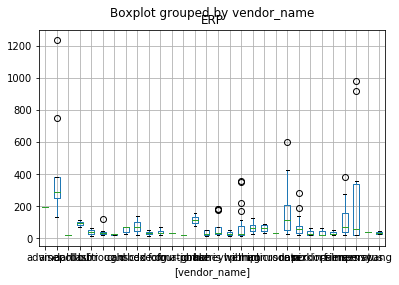

In [123]:
boxplot = computer_hardware_data.boxplot ( column = [ "ERP" ], by = [ 'vendor_name' ] )

In [124]:
# Descriptive Statistics: Attribute by Class
# MYCT by Class
describe_by_category ( computer_hardware_data, "MYCT", "vendor_name", transpose = True )

vendor_name  adviser  amdahl  apollo       basf         bti  burroughs  c.r.d  \
count            1.0     9.0     2.0   2.000000    2.000000    8.00000    6.0   
mean           125.0    26.0   400.0  55.000000  275.000000  137.75000  320.0   
std              NaN     3.0     0.0   7.071068  106.066017   19.02442    0.0   
min            125.0    23.0   400.0  50.000000  200.000000  110.00000  320.0   
25%            125.0    23.0   400.0  52.500000  237.500000  134.75000  320.0   
50%            125.0    26.0   400.0  55.000000  275.000000  143.00000  320.0   
75%            125.0    29.0   400.0  57.500000  312.500000  143.00000  320.0   
max            125.0    29.0   400.0  60.000000  350.000000  167.00000  320.0   

vendor_name  cambex        cdc         dec  ...  microdata         nas  \
count           5.0   9.000000    6.000000  ...        1.0   19.000000   
mean           50.0  46.666667  401.000000  ...      150.0   64.421053   
std             0.0  13.143439  324.090111  ... 

**Notes**


In [125]:
# Descriptive Statistics: Attribute by Class
# MMIN by Class
describe_by_category ( computer_hardware_data, "MMIN", "vendor_name", transpose = True )

vendor_name  adviser        amdahl       apollo         basf         bti  \
count            1.0      9.000000     2.000000     2.000000    2.000000   
mean           256.0  13333.333333   756.000000  3000.000000  288.000000   
std              NaN   8000.000000   345.068109  1414.213562  316.783838   
min            256.0   8000.000000   512.000000  2000.000000   64.000000   
25%            256.0   8000.000000   634.000000  2500.000000  176.000000   
50%            256.0   8000.000000   756.000000  3000.000000  288.000000   
75%            256.0  16000.000000   878.000000  3500.000000  400.000000   
max            256.0  32000.000000  1000.000000  4000.000000  512.000000   

vendor_name    burroughs       c.r.d       cambex          cdc          dec  \
count           8.000000    6.000000     5.000000     9.000000     6.000000   
mean         2129.500000  320.000000  1600.000000  2426.666667   756.000000   
std          1559.237817  156.767344   547.722558  1743.839155   267.288608   

**Notes**



In [126]:
# Descriptive Statistics: Attribute by Class
# MMAX by Class
describe_by_category ( computer_hardware_data, "MMAX", "vendor_name", transpose = True )

vendor_name  adviser        amdahl       apollo          basf           bti  \
count            1.0      9.000000     2.000000      2.000000      2.000000   
mean          6000.0  37333.333333  3250.000000  12000.000000   8032.000000   
std              NaN  16000.000000   353.553391   5656.854249  11268.453665   
min           6000.0  16000.000000  3000.000000   8000.000000     64.000000   
25%           6000.0  32000.000000  3125.000000  10000.000000   4048.000000   
50%           6000.0  32000.000000  3250.000000  12000.000000   8032.000000   
75%           6000.0  32000.000000  3375.000000  14000.000000  12016.000000   
max           6000.0  64000.000000  3500.000000  16000.000000  16000.000000   

vendor_name    burroughs        c.r.d        cambex           cdc  \
count           8.000000     6.000000      5.000000      9.000000   
mean         4862.500000  4500.000000  12000.000000   9126.666667   
std          1846.183322  1643.167673   5656.854249   7476.688772   
min         

**Notes**


In [127]:
# Descriptive Statistics: Attribute by Class
# CACH by Class
describe_by_category ( computer_hardware_data, "CACH", "vendor_name", transpose = True )

vendor_name  adviser      amdahl    apollo  basf  bti  burroughs     c.r.d  \
count            1.0    9.000000  2.000000   2.0  2.0    8.00000  6.000000   
mean           256.0   56.888889  2.000000  65.0  0.0   18.75000  2.666667   
std              NaN   31.098410  2.828427   0.0  0.0   49.87914  2.065591   
min            256.0   32.000000  0.000000  65.0  0.0    0.00000  0.000000   
25%            256.0   32.000000  1.000000  65.0  0.0    0.00000  1.000000   
50%            256.0   64.000000  2.000000  65.0  0.0    0.00000  4.000000   
75%            256.0   64.000000  3.000000  65.0  0.0    2.00000  4.000000   
max            256.0  128.000000  4.000000  65.0  0.0  142.00000  4.000000   

vendor_name  cambex         cdc       dec  ...  microdata         nas  \
count           5.0    9.000000  6.000000  ...        1.0   19.000000   
mean            8.0   45.111111  6.333333  ...        0.0   55.052632   
std             0.0   49.747976  3.614784  ...        NaN   57.210599   
min  

**Notes**



In [128]:
# Descriptive Statistics: Attribute by Class
# CHMIN by Class
describe_by_category ( computer_hardware_data, "CHMIN", "vendor_name", transpose = True )

vendor_name  adviser     amdahl  apollo  basf      bti  burroughs  c.r.d  \
count            1.0   9.000000     2.0   2.0  2.00000    8.00000    6.0   
mean            16.0  13.333333     1.0   1.0  2.50000    5.75000    1.0   
std              NaN   8.000000     0.0   0.0  2.12132    1.28174    0.0   
min             16.0   8.000000     1.0   1.0  1.00000    4.00000    1.0   
25%             16.0   8.000000     1.0   1.0  1.75000    5.00000    1.0   
50%             16.0   8.000000     1.0   1.0  2.50000    5.50000    1.0   
75%             16.0  16.000000     1.0   1.0  3.25000    6.25000    1.0   
max             16.0  32.000000     1.0   1.0  4.00000    8.00000    1.0   

vendor_name  cambex        cdc       dec  ...  microdata        nas  \
count           5.0   9.000000  6.000000  ...        1.0  19.000000   
mean            3.0   8.333333  1.666667  ...        8.0   5.684211   
std             0.0   5.500000  1.032796  ...        NaN   4.714665   
min             3.0   1.000000 

In [129]:
# Descriptive Statistics: Attribute by Class
# CHMAX by Class
describe_by_category ( computer_hardware_data, "CHMAX", "vendor_name", transpose = True )

vendor_name  adviser     amdahl    apollo  basf       bti  burroughs  \
count            1.0   9.000000  2.000000   2.0   2.00000   8.000000   
mean           128.0  33.777778  4.000000   8.0  18.00000  38.375000   
std              NaN  12.507775  2.828427   0.0  19.79899  22.154893   
min            128.0  16.000000  2.000000   8.0   4.00000  15.000000   
25%            128.0  32.000000  3.000000   8.0  11.00000  19.000000   
50%            128.0  32.000000  4.000000   8.0  18.00000  32.000000   
75%            128.0  32.000000  5.000000   8.0  25.00000  64.000000   
max            128.0  64.000000  6.000000   8.0  32.00000  64.000000   

vendor_name      c.r.d    cambex        cdc       dec  ...  microdata  \
count         6.000000  5.000000   9.000000   6.00000  ...        1.0   
mean          5.833333  5.400000  17.555556   6.50000  ...      128.0   
std           3.311596  0.547723   9.670976   5.00999  ...        NaN   
min           3.000000  5.000000   4.000000   1.00000  ... 

In [130]:
# Descriptive Statistics: Attribute by Class
# PRP by Class
describe_by_category ( computer_hardware_data, "PRP", "vendor_name", transpose = True )

vendor_name  adviser       amdahl     apollo        basf       bti  \
count            1.0     9.000000   2.000000    2.000000   2.00000   
mean           198.0   416.333333  39.000000  115.000000  22.50000   
std              NaN   315.423129   1.414214   32.526912  17.67767   
min            198.0   132.000000  38.000000   92.000000  10.00000   
25%            198.0   220.000000  38.500000  103.500000  16.25000   
50%            198.0   318.000000  39.000000  115.000000  22.50000   
75%            198.0   489.000000  39.500000  126.500000  28.75000   
max            198.0  1144.000000  40.000000  138.000000  35.00000   

vendor_name   burroughs      c.r.d    cambex         cdc        dec  ...  \
count          8.000000   6.000000   5.00000    9.000000   6.000000  ...   
mean          49.750000  42.666667  42.80000  130.111111  47.333333  ...   
std           34.208395  23.846733  13.38656  124.456262  24.873011  ...   
min           19.000000  23.000000  26.00000   20.000000  18.0000

In [131]:
# Descriptive Statistics: Attribute by Class
# ERP by Class
describe_by_category ( computer_hardware_data, "ERP", "vendor_name", transpose = True )

vendor_name  adviser       amdahl     apollo        basf        bti  \
count            1.0     9.000000   2.000000    2.000000   2.000000   
mean           199.0   436.666667  23.500000   93.500000  39.500000   
std              NaN   346.665905   0.707107   33.234019  34.648232   
min            199.0   132.000000  23.000000   70.000000  15.000000   
25%            199.0   253.000000  23.250000   81.750000  27.250000   
50%            199.0   290.000000  23.500000   93.500000  39.500000   
75%            199.0   381.000000  23.750000  105.250000  51.750000   
max            199.0  1238.000000  24.000000  117.000000  64.000000   

vendor_name   burroughs      c.r.d     cambex         cdc        dec  ...  \
count          8.000000   6.000000   5.000000    9.000000   6.000000  ...   
mean          44.625000  25.666667  58.600000   80.222222  35.833333  ...   
std           33.101306   3.265986  21.442948   42.845005  12.172373  ...   
min           22.000000  21.000000  30.000000   23.0

## Decision Tree: Computer Hardware Data

### Assign Feature Matrix & Target Vector


In [132]:
# Assign Variables
# X = Feature Matrix; All Attributes (i.e., drop instance class column)
# y = Target Vector; Categorical instance class (i.e., doesn't include the attribute features)
X_cpu = computer_hardware_data.drop ( [ "vendor_name", "model_name", "PRP", "ERP", "MYCT" ], axis = 1 ).values
y_cpu = computer_hardware_data [ "PRP" ].values

### Run Regression Experiment
### CART Algorithm

In [133]:
# Decision Tree Regression: Computer Hardware Data using CART Algorithm

# Log Experiment: Decision Tree Regression on Computer Hardware Data using CART Algorithm
logger.info ( "Running Experiment on Computer Hardware Data: Decision Tree Regression using CART Algorithm" )

# Run Regression Experiment using CART Algorithm
computer_hardware_experiment_results = run_regression_experiment (
    feature_matrix = X_cpu, 
    target_array = y_cpu, 
    early_stopping_values = np.linspace ( 1500, 30000, 1000 )
) # End experiment

# Log Experiment Accuracy    
logger.info (
    {
        k: mean_squared_error ( v [ "actuals" ], v [ "preds" ] )
        for k, v in computer_hardware_experiment_results.items()
    }
) # End logging accuracy

# Forest Fires Data Set
## Extract, Transform, Load: Forest Fires Data

### Description

[Regression] This is a difficult regression task, where the aim is to predict the burned area of forest
fires, in the northeast region of Portugal, by using meteorological and other data .

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Forest+Fires

### Attribute Information: 13 Attributes (d)

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
(this output variable is very skewed towards 0.0, thus it may make 
sense to model with the logarithm transform).


In [134]:
# Log ETL: Forest Fire Data
logger.info ( "ETL: Forest Fire Data Set" )

# Read Forest Fire Data
# Create dataframe
forest_fire_data = pd.read_csv (
        "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
    )

In [135]:
# Confirm data was properly read by examining data frame
forest_fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


**Notes**

As expected, we see 13 columns (# attributes and # class label). There are 517 entries (n = 517). We see that month and day attributes are objects; X, Y, RH are integer type variables; and FFMC, DMC, DC, ISI, temp, wind, rain, area variables are all float type.

In [136]:
# Verify whether any values are null
forest_fire_data.isnull().values.any()

False

**Note**

We see there are no null instances

In [137]:
# Again
forest_fire_data.isna().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

## (Brief) Exploratory Data Analysis: Forrest Fire Data

### Single Variable

Let's look at the summary statistics & Tukey's 5


In [138]:
# Look at first few rows of dataframe
forest_fire_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## (Brief) Exploratory Data Analysis: Forest Fire Data

### Single Variable

Let's look at the summary statistics & Tukey's 5


In [139]:
# Log EDA: Forest Fire Data
logger.info ( "EDA: Forest Fire Data Set" )

# Descriptive Statistics
forest_fire_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


**Notes**

Total number of observations: 517

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$


## (Brief) Exploratory Data Analysis: Forest Fire Data

### Pair-Wise: Attribute by Class

In [140]:
# Frequency of diagnoses classifications
forest_fire_data [ 'area' ].value_counts() # raw counts

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
        ... 
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64

In [141]:
# Get Columns
list ( forest_fire_data.columns )

['X',
 'Y',
 'month',
 'day',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area']

In [142]:
# Descriptive Statistics: Describe each variable by class (means only)
forest_fire_data.groupby ( [ 'area' ] )[ 'X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain' ].mean()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
area,,,,,,,,,,
0.00,4.518219,4.226721,90.219028,106.679757,522.878138,8.851822,18.427935,44.894737,3.91336,0.013765
0.09,5.000000,4.000000,91.800000,175.100000,700.700000,13.800000,25.700000,39.000000,5.40000,0.000000
0.17,6.000000,5.000000,94.300000,131.700000,607.100000,22.700000,19.400000,55.000000,4.00000,0.000000
0.21,6.000000,5.000000,93.100000,157.300000,666.700000,13.500000,22.100000,37.000000,3.60000,0.000000
0.24,8.000000,5.000000,93.100000,157.300000,666.700000,13.500000,24.000000,36.000000,3.10000,0.000000
...,...,...,...,...,...,...,...,...,...,...
200.94,2.000000,2.000000,92.500000,121.100000,674.400000,8.600000,18.200000,46.000000,1.80000,0.000000
212.88,1.000000,2.000000,91.000000,129.500000,692.600000,7.000000,18.800000,40.000000,2.20000,0.000000
278.53,7.000000,4.000000,89.200000,103.900000,431.600000,6.400000,22.600000,57.000000,4.90000,0.000000


In [143]:
# Descriptive Statistics: Describe each variable by class (means only)
forest_fire_data.groupby ( [ 'area' ] )[ 'X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain' ].describe()

X                                                   Y            \
         count      mean       std  min  25%  50%  75%  max  count      mean   
area                                                                           
0.00     247.0  4.518219  2.230305  1.0  3.0  4.0  6.0  9.0  247.0  4.226721   
0.09       1.0  5.000000       NaN  5.0  5.0  5.0  5.0  5.0    1.0  4.000000   
0.17       1.0  6.000000       NaN  6.0  6.0  6.0  6.0  6.0    1.0  5.000000   
0.21       1.0  6.000000       NaN  6.0  6.0  6.0  6.0  6.0    1.0  5.000000   
0.24       1.0  8.000000       NaN  8.0  8.0  8.0  8.0  8.0    1.0  5.000000   
...        ...       ...       ...  ...  ...  ...  ...  ...    ...       ...   
200.94     1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0    1.0  2.000000   
212.88     1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0    1.0  2.000000   
278.53     1.0  7.000000       NaN  7.0  7.0  7.0  7.0  7.0    1.0  4.000000   
746.28     1.0  8.000000       NaN  8.0  8.0  8.0  8.0  8.0    1.0  6.000000   
1090.84    1.0  6.000000       NaN  6.0  6.0  6.0  6.0  6.0    1.0  5.000000   

         ...  wind        rain                                               
         ...   75%  max  count      mean       std  min  25%  50%  75%  max  
area     ...                                                                 
0.00     ...  5.15  8.5  247.0  0.013765  0.100268  0.0  0.0  0.0  0.0  1.0  
0.09     ...  5.40  5.4    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
0.17     ...  4.00  4.0    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
0.21     ...  3.60  3.6    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
0.24     ...  3.10  3.1    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
...      ...   ...  ...    ...       ...       ...  ...  ...  ...  ...  ...  
200.94   ...  1.80  1.8    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
212.88   ...  2.20  2.2    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
278.53   ...  4.90  4.9    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
746.28   ...  4.90  4.9    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
1090.84  ...  4.00  4.0    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  

[251 rows x 80 columns]

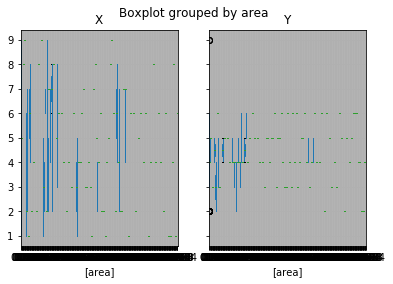

In [144]:
boxplot = forest_fire_data.boxplot ( column = [ "X", "Y"], by = [ 'area' ] )

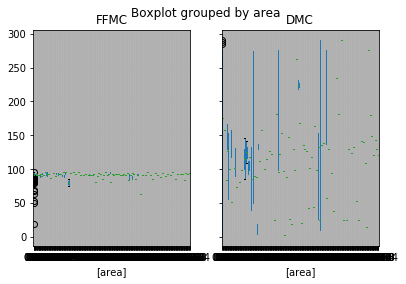

In [145]:
boxplot = forest_fire_data.boxplot ( column = [ 'FFMC','DMC' ], by = [ 'area' ] )

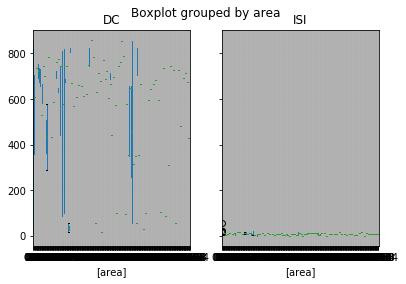

In [146]:
boxplot = forest_fire_data.boxplot ( column = [ "DC", "ISI" ], by = [ 'area' ] )

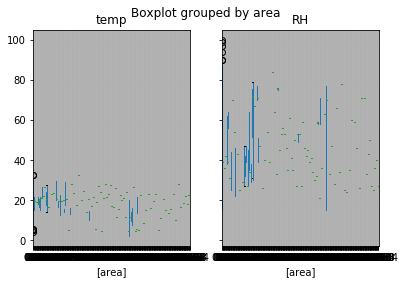

In [147]:
boxplot = forest_fire_data.boxplot ( column = [ "temp", "RH" ], by = [ 'area' ] )

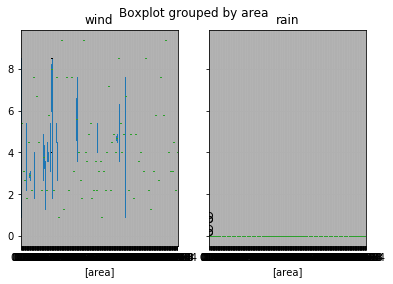

In [148]:
boxplot = forest_fire_data.boxplot ( column = [ "wind", "rain" ], by = [ 'area' ] )

## Decision Tree: Forest Fire Data

### Assign Feature Matrix & Target Vector

In [149]:
# Assign Variables
# X = Feature Matrix; All Attributes (i.e., drop instance class column)
# y = Target Vector; Categorical instance class (i.e., doesn't include the attribute features)
X_fires = ( forest_fire_data.drop ( "area", axis = 1 ).pipe ( lambda df: pd.get_dummies ( df, columns = [ "month", "day" ], drop_first = True ) ).values )
y_fires = forest_fire_data [ "area" ].values

### Run Regression Experiment
### CART Algorithm

In [150]:
# Decision Tree Regression: Forest Fire Data using CART Algorithm

# Log Experiment: Decision Tree Regression on Forest Fire Data using CART Algorithm
logger.info ( "Running Experiment on Forest Fire Data: Decision Tree Regression Using CART Algorithm" )

# Run Regression Experiment using CART Algorithm
fires_experiment = run_regression_experiment (
    feature_matrix = X_fires,
    target_array = y_fires,
    early_stopping_values = np.linspace ( 1875, 5000, 500 )
) # End experiment

# Log Accuracy
logger.info (
    {
        k: mean_squared_error ( v [ "actuals" ], v [ "preds" ] )
        for k, v in fires_experiment.items()
    }
) # End logging accuracy

logger.info ( f"Run time: { time.time() }" )
